<a href="https://colab.research.google.com/github/JustoSole/Analisis-Predictivo-2023-1Q/blob/main/TP2_AnalisisPredictivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
train = pd.read_csv('base_train.csv')
val = pd.read_csv('base_val.csv')

# MODIFICACION DE COLUMNAS A TIPO DE DATO ADECUADO

Creo una columna booleana que me indica si el barrio del host es el mismo que el de la propiedad alquliada para ver como influye esto al review 

In [ ]:
train['host_vive_mismo_barrio'] = train['host_neighbourhood'] == train['neighbourhood_cleansed']
train['host_vive_mismo_barrio'] = train['host_vive_mismo_barrio'].astype(bool)
train = train.drop('host_neighbourhood', axis=1)

In [ ]:
train['host_vive_mismo_barrio'].value_counts()

False    4717
True      211
Name: host_vive_mismo_barrio, dtype: int64

In [ ]:
train['host_since'] = pd.to_datetime(train['host_since'], format="%Y/%m/%d")
train['calendar_updated'] = pd.to_datetime(train['calendar_updated'], format="%Y/%m/%d")
train['price'] = train['price'].str.replace('$', '').str.replace(',', '').astype(float)
train['host_acceptance_rate'] = train['host_acceptance_rate'].str.replace('%','').astype(float)
train['host_response_rate'] = train['host_response_rate'].str.replace('%', '').astype(float) / 100

#d#e variables de string a boolenas 

# list of boolean columns
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']

# replace 't' and 'f' with 1 and 0
train[bool_cols] = train[bool_cols].replace({'t': 1, 'f': 0})

# convert columns to boolean
train[bool_cols] = train[bool_cols].astype(bool)

##de objectos a var categoricas

train['host_response_time'] = train['host_response_time'].astype('category')

train['host_location'] = train['host_location'].astype('category')

train['host_verifications'] = train['host_verifications'].astype('category')

train['neighbourhood'] = train['neighbourhood'].astype('category')

train['neighbourhood_cleansed'] = train['neighbourhood_cleansed'].astype('category')

train['property_type'] = train['property_type'].astype('category')

train['room_type'] = train['room_type'].astype('category')

##Bathroom y bathroom text deberian tener la misma info por lo que voy a reprocesar la data

train[['num_baths', 'bath_type']] = train['bathrooms_text'].str.extract(r'(\d+\.?\d*)\s(\b\w+\b)', expand=True)

train['bath_type'] = train['bath_type'].map({'private': 'private', 'bath': 'private', 'shared': 'shared'})

train['bath_type'] = train['bath_type'].fillna('private')

train['num_baths'] = train['num_baths'].astype(float)

train = train.drop(['bathrooms_text', 'bathrooms'], axis=1)

train['bath_type'] = train['bath_type'].astype('category')

<ipython-input-81-577916d7fca7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['price'] = train['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [ ]:
train[['num_baths','bath_type']]

,num_baths,bath_type
0,1.5,private
1,1.5,shared
2,1.0,private
3,1.5,private
4,1.0,shared
...,...,...
4923,1.0,private
4924,1.0,private
4925,1.5,private
4926,1.5,private


In [ ]:
pd.set_option('display.max_columns', None)

#Pequeno eda

Nombre de columnas, cantidad y numero de observaciones

In [ ]:
print(train.shape)  # Print number of rows and columns
print(train.columns)  # Print column names

print(val.shape)  # Print number of rows and columns
print(val.columns)  # Print column names

(4928, 68)
Index(['id', 'source', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_revie

Tipo de dato de columna y valores no nulos de cada una 

In [ ]:
print(train.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4928 entries, 0 to 4927
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            4928 non-null   int64         
 1   source                                        4928 non-null   object        
 2   name                                          4928 non-null   object        
 3   description                                   4925 non-null   object        
 4   neighborhood_overview                         3580 non-null   object        
 5   host_id                                       4928 non-null   int64         
 6   host_name                                     4928 non-null   object        
 7   host_since                                    4928 non-null   datetime64[ns]
 8   host_location                                 4507 non-null   catego

Resumen estadistico de las variables numericas 

In [ ]:
print(train.describe())

                 id       host_id  host_response_rate  host_acceptance_rate  \
count  4.928000e+03  4.928000e+03         3266.000000           4152.000000   
mean   6.294489e+15  8.186850e+07            0.950181             80.490848   
std    5.873144e+16  1.114891e+08            0.145942             26.512724   
min    2.818000e+03  3.159000e+03            0.000000              0.000000   
25%    1.135244e+07  8.692070e+06            1.000000             67.000000   
50%    2.437740e+07  2.735878e+07            1.000000             95.000000   
75%    4.038502e+07  1.056092e+08            1.000000            100.000000   
max    5.685149e+17  4.865512e+08            1.000000            100.000000   

       host_listings_count  host_total_listings_count  \
count          4928.000000                4928.000000   
mean              2.508929                   4.768872   
std              10.565612                  28.580679   
min               1.000000                   1.000000   
25%

HISTOGRMAS 

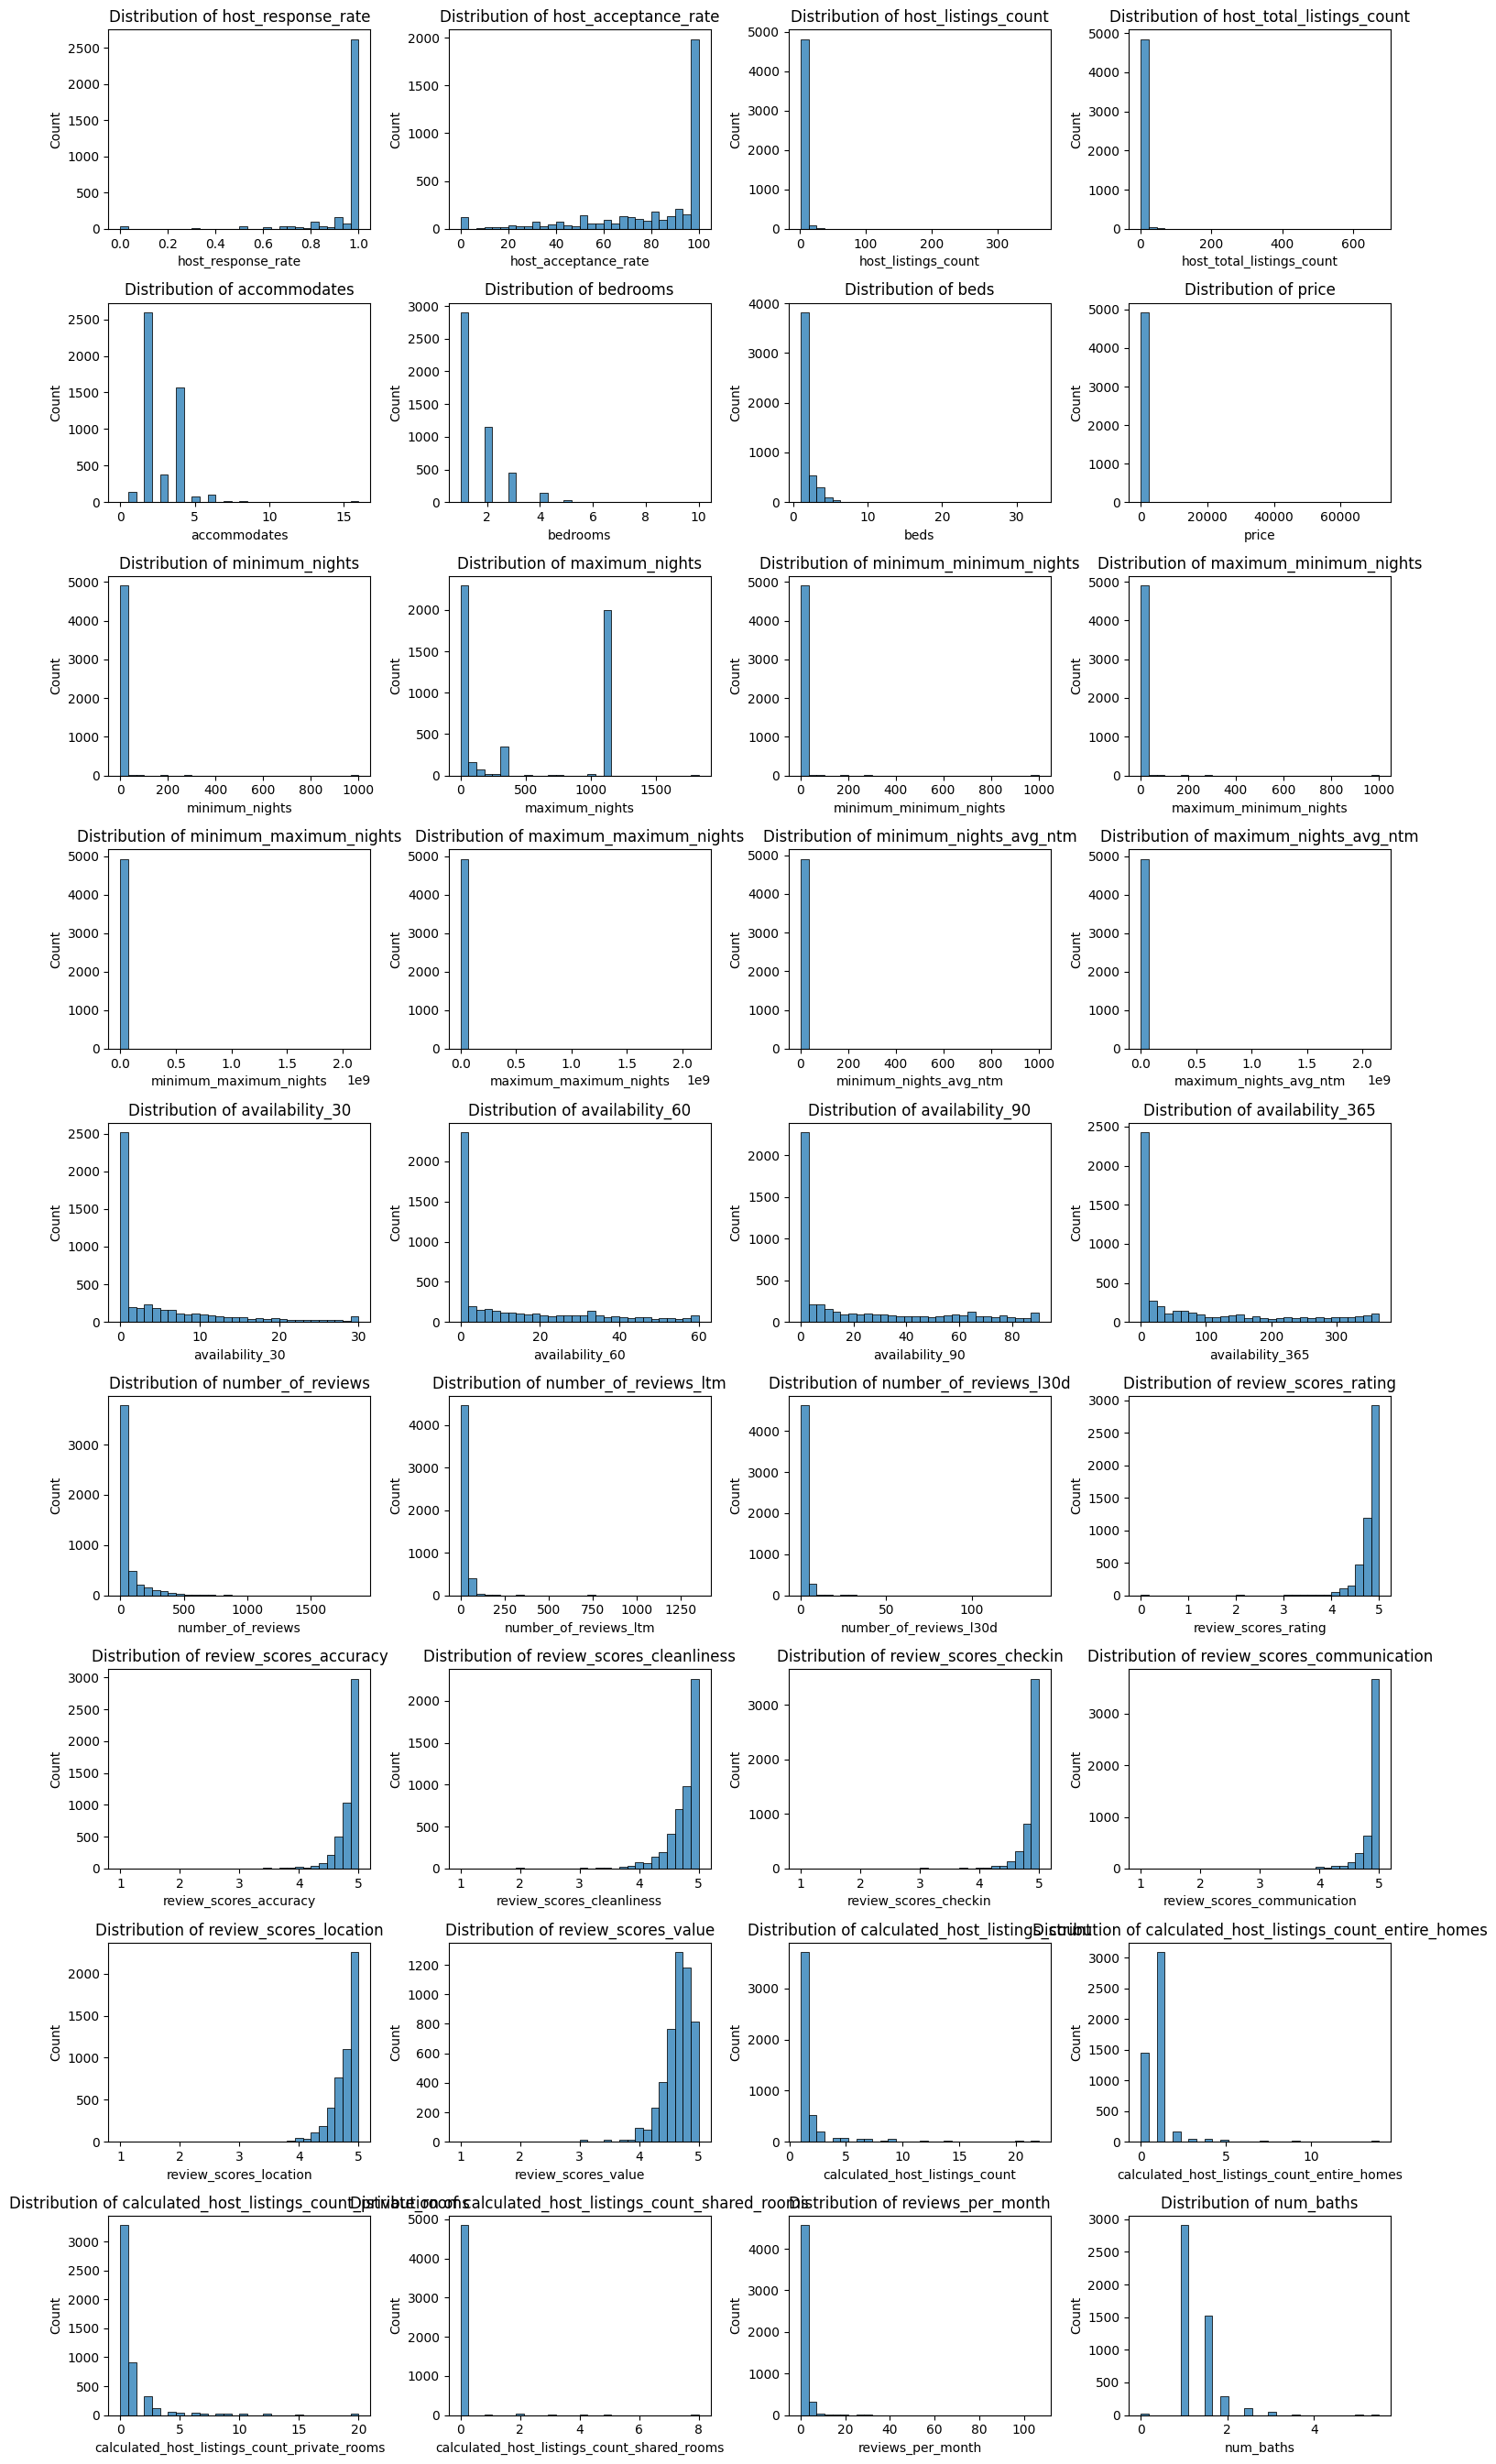

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_cols = train.select_dtypes(include=['int64', 'float64']).columns
exclude_cols = ['id', 'host_id', 'neighbourhood_group_cleansed', 'latitude', 'longitude']

num_cols = [col for col in num_cols if col not in exclude_cols]

n_features = len(num_cols)

n_cols = 4
n_rows = math.ceil(n_features / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))

for i, col in enumerate(num_cols):
    r = i // n_cols
    c = i % n_cols
    ax = axs[r, c] if n_rows > 1 else axs[c]  
    sns.histplot(train[col], bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')

for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()


VARIABLES CATEGORICAS

In [ ]:
for col in train.columns:
    if train[col].dtype == 'category':
        print(f'\nUnique values for {col}:\n', train[col].value_counts())


Unique values for host_location:
 Amsterdam, Netherlands        4208
Netherlands                    133
Amstelveen, Netherlands          8
London, United Kingdom           7
Haarlem, Netherlands             7
                              ... 
Heerhugowaard, Netherlands       1
Heemskerk, Netherlands           1
Harlingen, Netherlands           1
Hamburg, Germany                 1
İstanbul, Turkey                 1
Name: host_location, Length: 107, dtype: int64

Unique values for host_response_time:
 within an hour        1917
within a few hours     656
within a day           635
a few days or more      58
Name: host_response_time, dtype: int64

Unique values for host_verifications:
 ['email', 'phone']                  4009
['email', 'phone', 'work_email']     643
['phone']                            250
['phone', 'work_email']               16
['email']                              5
[]                                     5
Name: host_verifications, dtype: int64

Unique values for ne

Correlaciones 

<ipython-input-28-b94acbdafb40>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm', center=0)


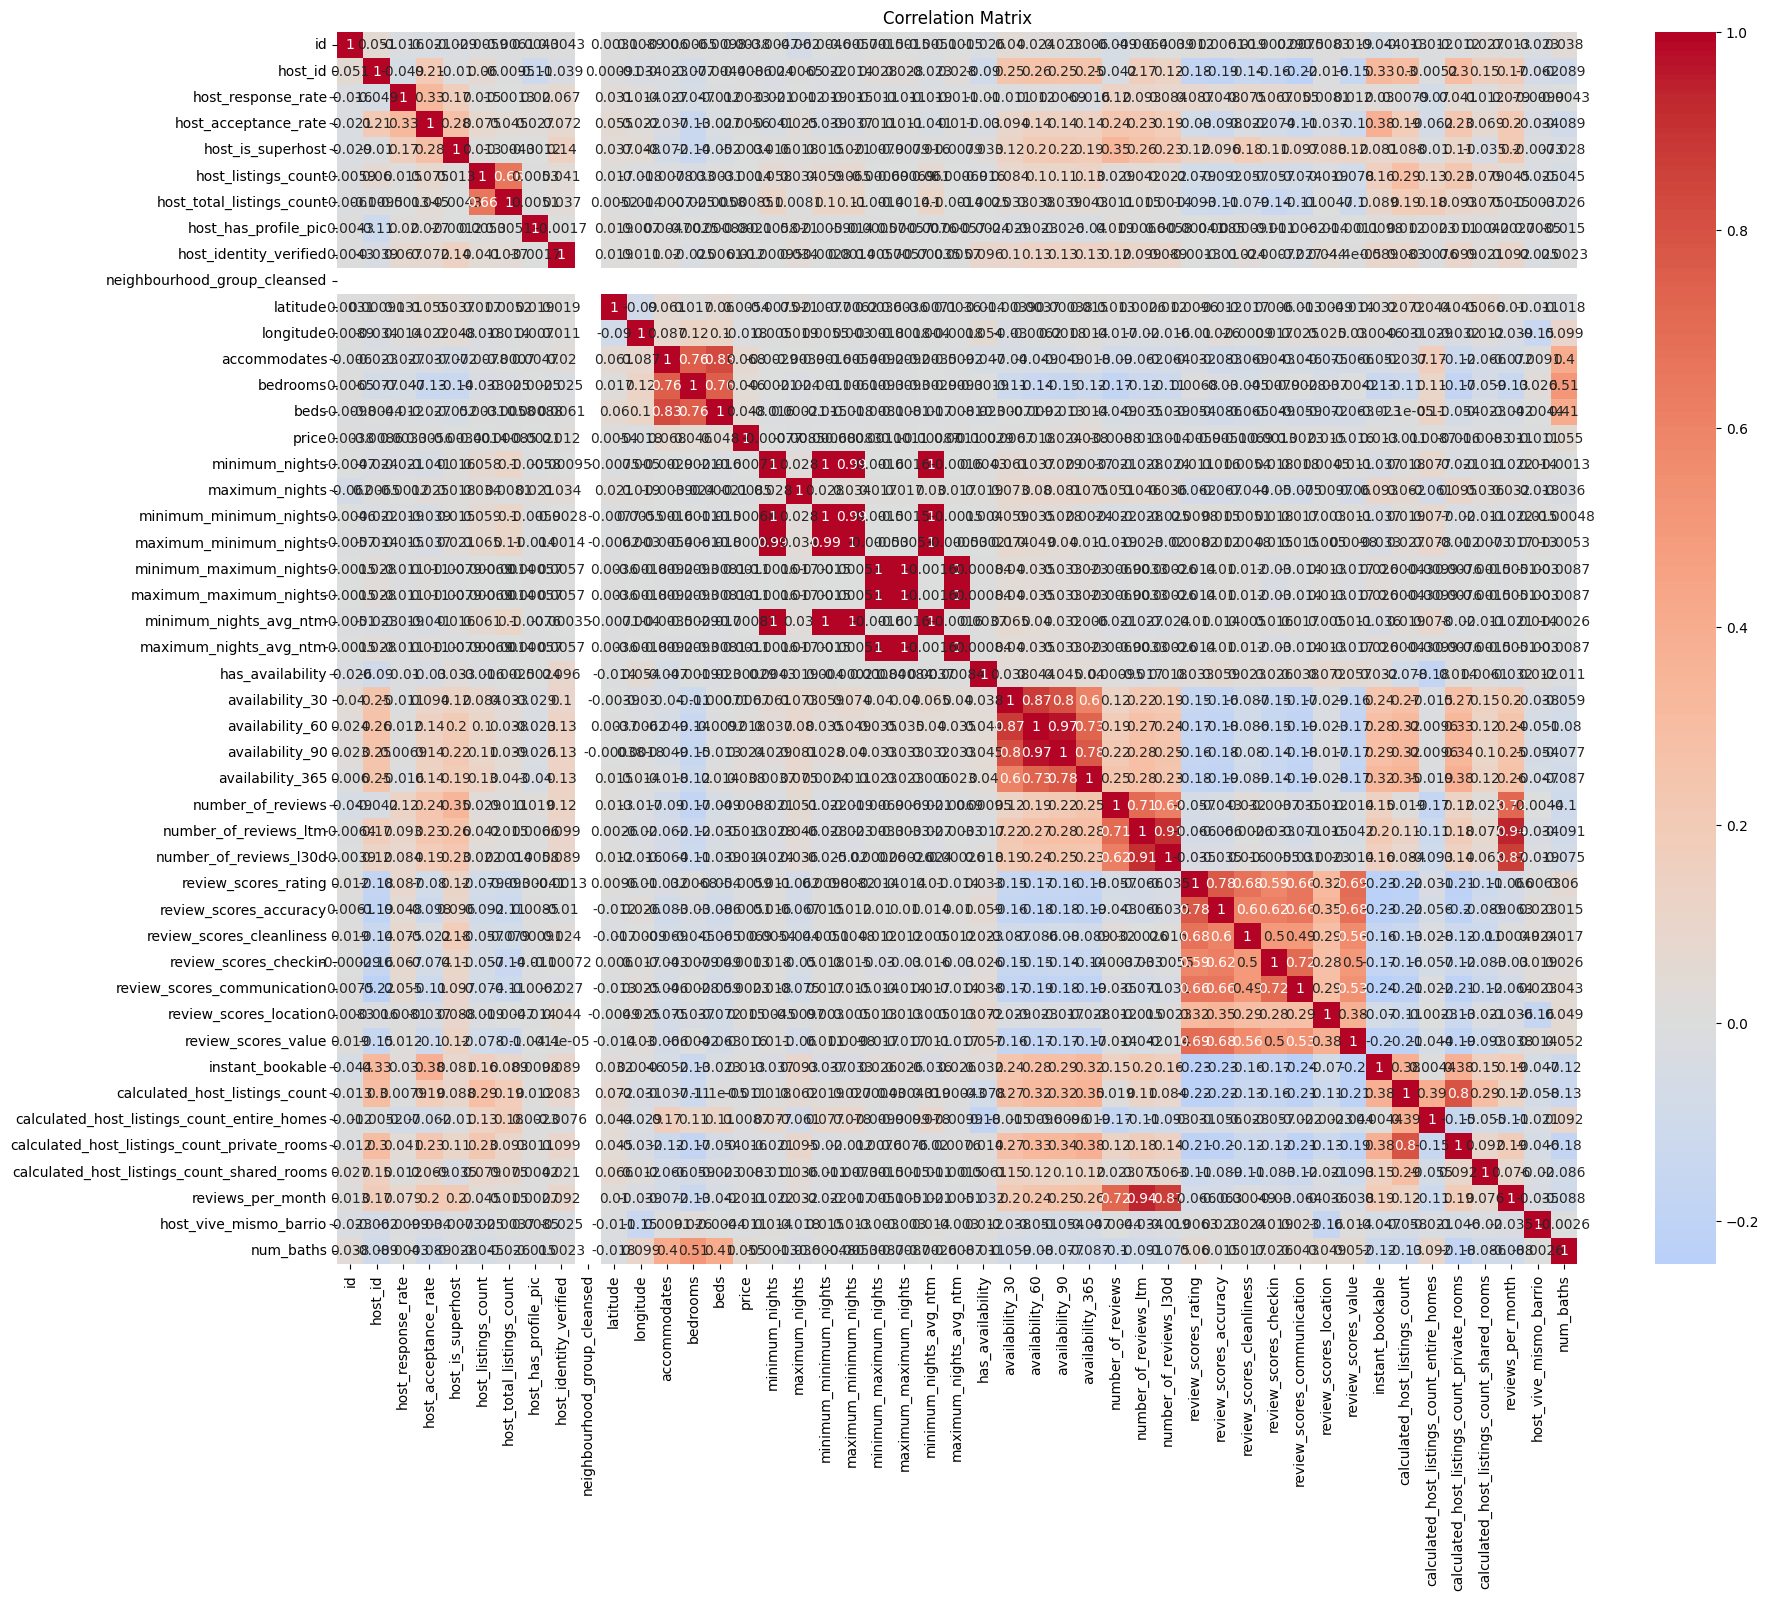

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
correlation = train.corr()['review_scores_rating']

Highest correlated column:  review_scores_accuracy
Correlation:  0.7757589005375336
Lowest correlated column:  instant_bookable
Correlation:  -0.2295159935710952


<ipython-input-29-9b830abe1a53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()['review_scores_rating']


In [ ]:
highest_corr = correlation.nlargest(20)[1:]
print("Top highest correlated columns:\n", highest_corr)

Top 10 highest correlated columns:
 review_scores_accuracy         0.775759
review_scores_value            0.694974
review_scores_cleanliness      0.675743
review_scores_communication    0.655998
review_scores_checkin          0.589296
review_scores_location         0.319735
host_is_superhost              0.115693
host_response_rate             0.087059
num_baths                      0.060031
has_availability               0.033205
id                             0.012046
minimum_nights                 0.011183
minimum_nights_avg_ntm         0.010101
minimum_minimum_nights         0.009824
latitude                       0.009558
maximum_minimum_nights         0.008233
bedrooms                       0.006790
host_vive_mismo_barrio         0.006280
host_has_profile_pic          -0.000407
Name: review_scores_rating, dtype: float64


In [ ]:
lowest_corr = correlation.nsmallest(20)
print("Top lowest correlated columns:\n", lowest_corr)

Top 10 lowest correlated columns:
 instant_bookable                               -0.229516
calculated_host_listings_count                 -0.218825
calculated_host_listings_count_private_rooms   -0.210160
availability_365                               -0.178099
host_id                                        -0.176212
availability_60                                -0.165280
availability_90                                -0.162869
availability_30                                -0.149923
calculated_host_listings_count_shared_rooms    -0.112641
host_total_listings_count                      -0.092780
host_acceptance_rate                           -0.079626
host_listings_count                            -0.078836
reviews_per_month                              -0.065624
number_of_reviews_ltm                          -0.065592
maximum_nights                                 -0.062139
number_of_reviews                              -0.057089
beds                                           -0.053

# NA'S 

In [ ]:
null_columns = []

for col in train.columns:
    null_sum = train[col].isnull().sum()
    if null_sum > 0:
      print(f"{col}: {null_sum}")
      null_columns.append(col)

print(null_columns)

description: 3
neighborhood_overview: 1348
host_location: 421
host_about: 1746
host_response_time: 1662
host_response_rate: 1662
host_acceptance_rate: 776
neighbourhood: 1348
neighbourhood_group_cleansed: 4928
bedrooms: 240
beds: 70
calendar_updated: 4928
review_scores_accuracy: 4
review_scores_cleanliness: 4
review_scores_checkin: 4
review_scores_communication: 4
review_scores_location: 4
review_scores_value: 4
license: 98
num_baths: 18
['description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'neighbourhood', 'neighbourhood_group_cleansed', 'bedrooms', 'beds', 'calendar_updated', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'num_baths']


Voy a dropear directamente las filas de resenas que tienen NA'S

In [ ]:
reviews_na = ['review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

train = train.dropna(subset=reviews_na )

print(reviews_na)

['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [ ]:
null_columns = [col for col in null_columns if col not in reviews_na]


print(null_columns)

['description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'neighbourhood', 'neighbourhood_group_cleansed', 'bedrooms', 'beds', 'calendar_updated', 'license', 'num_baths']


In [ ]:
category_list = []
numbers_list = []

# Iterate over DataFrame columns
for column_name, column_data in train.iteritems():
    if column_data.isnull().any():
        if (column_data.dtype == 'object') or (column_data.dtype == 'category'):
          category_list.append(column_name)
        if (column_data.dtype == 'int64') or (column_data.dtype == 'float64'):
          numbers_list.append(column_name)

print("Categorical columns with null values:", category_list)
print("Numerical columns with null values:", numbers_list)



Categorical columns with null values: ['description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'neighbourhood', 'license']
Numerical columns with null values: ['host_response_rate', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'bedrooms', 'beds', 'num_baths']


<ipython-input-87-a265cc6dd45a>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column_data in train.iteritems():


imputar na;s de cuadros de descripccion

In [ ]:
def fill_na_with_empty_string(df, column_name):
    df[column_name] = df[column_name].fillna("")
    return df

train = fill_na_with_empty_string(train, 'description')
train = fill_na_with_empty_string(train, 'neighborhood_overview')
train = fill_na_with_empty_string(train, 'host_about')

<ipython-input-88-331126fb5186>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].fillna("")


Imputar na's numericos

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer


def impute_missing_values(df, target_column):
  
    # Create an imputer object with a most frequent filling strategy
    imputer = SimpleImputer(strategy='most_frequent')
    cols_to_impute = ['host_response_time','host_response_rate']

    # Fit the imputer and transform the dataset
    train[cols_to_impute] = imputer.fit_transform(train[cols_to_impute])

    return df

# OUTLIERS

In [ ]:
#Extraccion de var nuemricas

numerical_columns = []

for column in train.columns:
    if pd.api.types.is_numeric_dtype(train[column]):
        numerical_columns.append(column)

print(numerical_columns)

['id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_

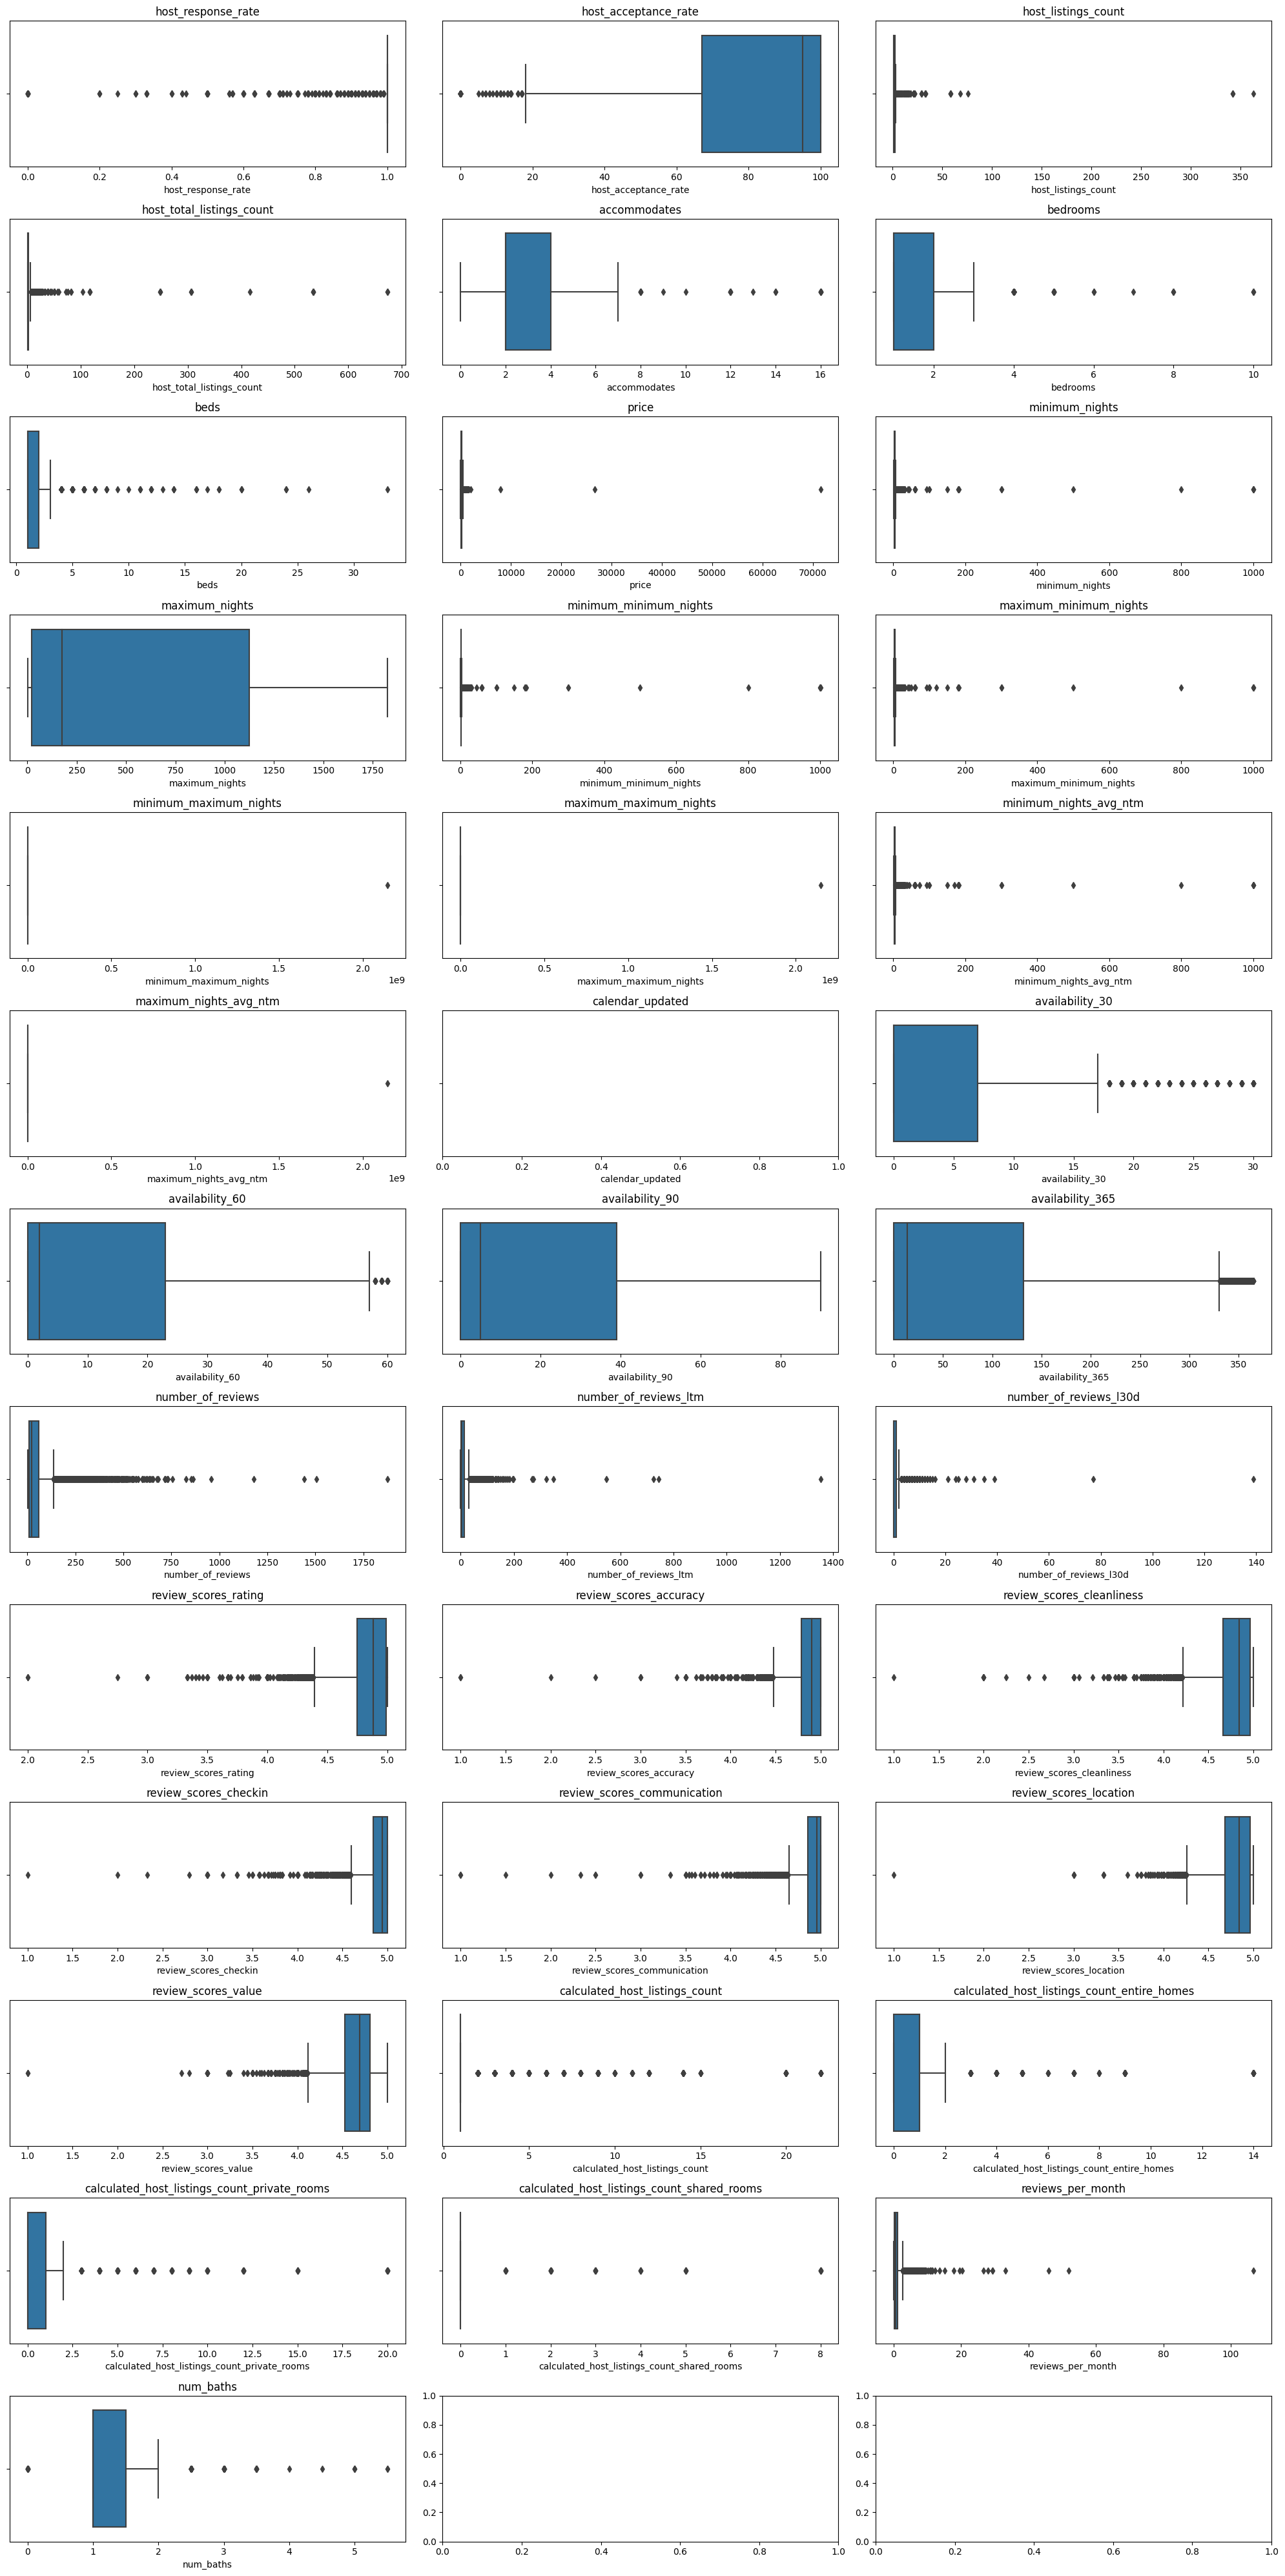

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 
                'accommodates','bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
                'minimum_maximum_nights', 'maximum_maximum_nights',
                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
                'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'num_baths']


num_cols_per_row = 3
num_rows = int(len(numeric_cols) / num_cols_per_row) + (1 if len(numeric_cols) % num_cols_per_row != 0 else 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(20, 40))

for i, col in enumerate(numeric_cols):
    row_idx = int(i / num_cols_per_row)
    col_idx = i % num_cols_per_row
    sns.boxplot(x=train[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)

plt.tight_layout()
plt.show()


### Analisis de los outliers 

Outliers: price

<Axes: >

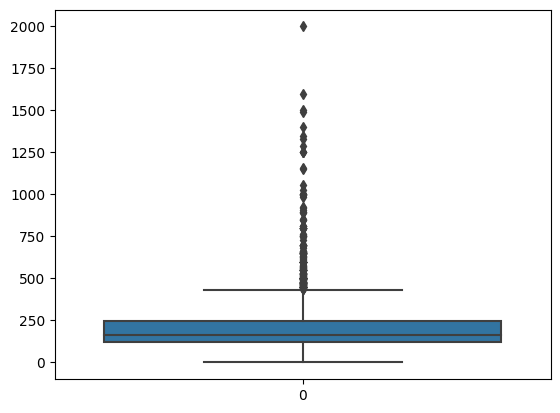

In [ ]:
sns.boxplot(train['price'])

In [ ]:
lower_bound = 0
upper_bound = 7000
predictor_variables = ['bedrooms', 'beds', 'accommodates', 'num_baths']

import numpy as np

def impute_outliers(price, lower_bound, upper_bound):
    if isinstance(price, str) or price < lower_bound or price > upper_bound:
        return np.nan
    else:
        return price

# Muestra las filas con un precio mayor a 7000 antes de imputar los valores atípicos
print(train[train['price'] > upper_bound])

# Aplica la función impute_outliers a la columna 'price'
train['price'] = train['price'].apply(impute_outliers, args=(lower_bound, upper_bound))

# Calcula el precio promedio para cada grupo
average_price_per_group = train.groupby(predictor_variables)['price'].transform('mean')

# Completa los valores faltantes en la columna 'price' con el precio promedio del mismo grupo
train['price'] = train['price'].fillna(average_price_per_group)

<Axes: >

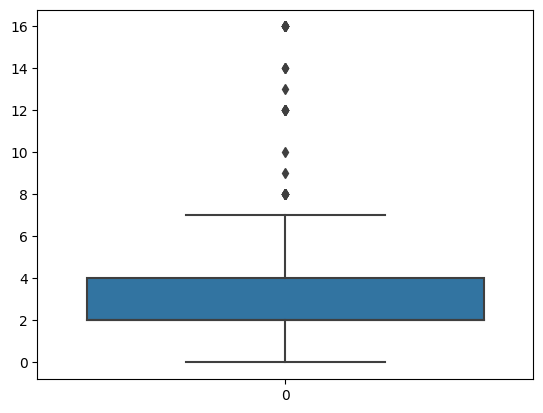

In [ ]:
import seaborn as sns
sns.boxplot(train['accommodates'])

Outliers: Acomodates

In [ ]:
# Vamos a ver las filas donde 'accommodates' es mayor que 10 y las columnas especificadas
train_cols_to_display = train[train['accommodates'] > 7][['accommodates','property_type', 'bedrooms', 'beds', 'price', 'num_baths', 'bath_type']]

# Imprimí el DataFrame
print(train_cols_to_display)


      accommodates              property_type  bedrooms  beds   price  \
36              12         Entire rental unit       5.0  12.0   986.0   
43              16                       Boat      10.0  26.0  1002.0   
312             12                Entire home       3.0  12.0   416.0   
522             14                       Boat       6.0  14.0   630.0   
545             16                       Boat       5.0  16.0   764.0   
653              8                Entire home       4.0   6.0   300.0   
925             16         Entire rental unit       3.0  20.0   542.0   
1036            16                       Boat       8.0  18.0   643.0   
1117             8                Entire home       4.0   6.0   150.0   
1246            16                Entire home       5.0  17.0   656.0   
1403             8                Entire home       5.0   6.0   700.0   
1410            12           Entire townhouse       4.0  12.0   405.0   
1587            12          Entire guesthouse      

Outliers: host_acceptance_rate

In [ ]:
display(train[train['host_acceptance_rate']  == 0])

In [ ]:
# Calculamos la mediana de 'host_acceptance_rate', pero no contamos los ceros
valor_mediano = train.loc[train['host_acceptance_rate'] != 0, 'host_acceptance_rate'].median()

# Cambiamos los ceros por el valor mediano que calculamos
train.loc[train['host_acceptance_rate'] == 0, 'host_acceptance_rate'] = valor_mediano

Noches de estadia

In [ ]:
print(train.columns)

Index(['id', 'source', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', '

Outliers: Availability_365

In [ ]:
display(train[train['availability_365'] >= 365]) #asumo que aca no hay un error de imputacion simplente no estan siendo alquiladas las propiedades

,id,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_vive_mismo_barrio,num_baths,bath_type
543,4600731,city scrape,Apt. near Vondelpark and Schiphol,"A neat, cosy and spacious apartment close to t...",,22605509,Sander,2014-10-16,"Amsterdam, Netherlands",,within an hour,1.00,96.0,False,1,1,"['email', 'phone']",True,True,NaN,Zuid,NaN,52.348080,4.850650,Entire rental unit,Entire home/apt,2,1.0,1.0,"[""Books and reading material"", ""Smoke alarm"", ...",493.0,1,1125,1,1,1125,1125,1.0,1125.0,NaT,True,30,60,90,365,2022-12-05,5,0,0,2015-04-19,2019-05-19,4.80,5.00,5.00,5.00,5.00,4.60,4.60,0363 9B77 A19A E1FA 87BD,False,1,1,0,0,0.05,False,1.0,private
697,6089697,city scrape,Amsterdam Sunny top floor apartment in center,Amsterdam luxurious apartment: has two balconi...,,16442553,Irthe,2014-06-05,Netherlands,"I was born in Amsterdam. I love traveling, sur...",within a few hours,1.00,41.0,False,1,3,"['email', 'phone']",True,True,NaN,Westerpark,NaN,52.389910,4.877080,Private room in rental unit,Private room,4,2.0,3.0,"[""Books and reading material"", ""Smoke alarm"", ...",359.0,1,1125,1,1,1125,1125,1.0,1125.0,NaT,True,30,60,90,365,2022-12-05,56,7,0,2015-05-04,2022-09-27,4.73,4.75,4.57,4.79,4.84,4.67,4.48,0363 5FFE 6FFF 15B3 4C74,False,1,0,1,0,0.61,False,1.0,private
2048,20001770,city scrape,Quiet place for business travelers near center,Private room in a nice apartment near the city...,The apartment is located in 'Oud-zuid' (Old-So...,10344430,Daan,2013-11-30,"Amsterdam, Netherlands",,within an hour,1.00,96.0,False,1,6,"['email', 'phone']",True,True,"Amsterdam, NH, Netherlands",Zuid,NaN,52.349890,4.849090,Private room in condo,Private room,1,1.0,1.0,"[""Books and reading material"", ""Smoke alarm"", ...",100.0,10,1125,10,10,1125,1125,10.0,1125.0,NaT,True,30,60,90,365,2022-12-05,6,0,0,2017-08-16,2019-11-18,5.00,5.00,4.83,4.83,5.00,4.83,4.50,0363AF6809238187EE54,False,1,0,1,0,0.09,False,1.0,shared
2650,26794556,city scrape,The white studio,"THE WHITE - Private studio, bathroom & kitche...",Did you knew the Amsterdam canals are one of t...,201491909,Joyce,2018-07-11,NaN,,within an hour,1.00,96.0,False,2,2,['phone'],True,True,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,NaN,52.361230,4.895300,Private room in bed and breakfast,Private room,2,1.0,1.0,"[""Smoke alarm"", ""Bed linens"", ""Wifi"", ""Long te...",213.0,2,90,2,3,90,90,2.3,90.0,NaT,True,30,60,90,365,2022-12-05,24,9,0,2018-12-20,2022-09-17,3.79,3.92,4.33,3.83,3.96,4.79,3.71,0363 D3A1 4AB2 53A8 62CB,False,2,0,2,0,0.50,False,1.0,private
3046,32099173,city scrape,Nice room in Amsterdam Sloten,Tweepersoonskamer met twee aparte bedden ( 2* ...,"Supermarkten, snackbar, bakker, post en nog an...",117820649,Mohanned,2017-02-23,"Amsterdam, Netherlands",Ik ben een man 44 ik ben heel rustig en ik hou...,within a day,1.00,100.0,False,5,6,"['email', 'phone']",True,False,"A

In [ ]:
import numpy as np

def impute_outliers(price, lower_bound, upper_bound):
    if isinstance(price, str) or price < lower_bound or price > upper_bound:
        return np.nan
    else:
        return price


def handle_outliers(df):
    lower_bound = 0
    upper_bound = 7000
    predictor_variables = ['bedrooms', 'beds', 'accommodates', 'num_baths']
    
    # Apply the impute_outliers function to the 'price' column
    df['price'] = df['price'].apply(impute_outliers, args=(lower_bound, upper_bound))

    # Calculate the average price for each group
    average_price_per_group = df.groupby(predictor_variables)['price'].transform('mean')

    # Fill the missing values in the 'price' column with the average price of the same group
    df['price'] = df['price'].fillna(average_price_per_group)

    # Calculate the median values for maximum_nights and minimum_nights without outliers
    max_nights_median_no_outliers = df.loc[df['maximum_nights'] <= df['maximum_nights'].median(), 'maximum_nights'].median()
    min_nights_median_no_outliers = df.loc[df['minimum_nights'] <= df['minimum_nights'].median(), 'minimum_nights'].median()

    # Replace the outliers with the median values
    df.loc[df['maximum_nights'] > df['maximum_nights'].median(), 'maximum_nights'] = max_nights_median_no_outliers
    df.loc[df['minimum_nights'] > df['minimum_nights'].median(), 'minimum_nights'] = min_nights_median_no_outliers

    print("Median maximum_nights without outliers:", max_nights_median_no_outliers)
    print("Median minimum_nights without outliers:", min_nights_median_no_outliers)

    # Calculamos la mediana de 'host_acceptance_rate', pero no contamos los ceros
    valor_mediano = df.loc[df['host_acceptance_rate'] != 0, 'host_acceptance_rate'].median()

    # Cambiamos los ceros por el valor mediano que calculamos
    df.loc[df['host_acceptance_rate'] == 0, 'host_acceptance_rate'] = valor_mediano

    return df

# Amenities

In [ ]:
import re
from collections import Counter

# Limpieza de la columna 'amenities'
train['amenities'] = train['amenities'].astype(str)
train['amenities'] = train['amenities'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s,]', '', x))

# Transformación de la columna 'amenities' en una lista de listas
train['amenities'] = train['amenities'].apply(lambda x: [amenity.strip() for amenity in x.split(',')])

# Conteo de todos los amenities
amenities_count = Counter([amenity for amenities in train['amenities'] for amenity in amenities])

# Lista de amenities que aparecen 3 veces o más
relevant_amenities = [amenity for amenity, count in amenities_count.items() if count >= 3]

# Creación de columnas binarias para cada amenity relevante
for amenity in relevant_amenities:
    train['amenity_' + amenity] = train['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Creación de una nueva columna para el total de amenities
train['total_amenities'] = train['amenities'].apply(len)

In [ ]:
import ast
from sklearn.preprocessing import StandardScaler

# Creación de columnas binarias para cada amenity único
for amenity in relevant_amenities:
    train['amenity_' + amenity] = train['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Normalización de las características binarias
scaler = StandardScaler()
train[['amenity_' + amenity for amenity in relevant_amenities]] = scaler.fit_transform(train[['amenity_' + amenity for amenity in relevant_amenities]])

# Reemplazo de amenities_columns con los nuevos nombres de columna
amenities_columns = ['amenity_' + amenity for amenity in relevant_amenities]

# Configuración de la variable objetivo al nombre de columna correcto
target_variable = 'review_scores_rating'

# Cálculo de correlaciones
correlations = train[amenities_columns + [target_variable]].corr()


In [ ]:
# Crea un diccionario para guardar las correlaciones
correlation_dict = {}

# Recorre cada columna de amenities
for col in amenities_columns:
    # Guarda la correlación absoluta de cada amenity con la variable target
    correlation_dict[col] = abs(correlations.loc[col, target_variable])

# Ordena el diccionario por valor de correlación
sorted_correlations = sorted(correlation_dict.items(), key=lambda x: x[1])

# Correlaciones mayores a 0.05, de mayor a menor
high_correlation_cols = [col for col, corr in sorted_correlations if corr > 0.05][::-1]
print("Correlaciones mayores a 0.05, de mayor a menor:")
for col in high_correlation_cols:
    print(f'{col}: {correlation_dict[col]}')

Correlaciones mayores a 0.05, de mayor a menor:
amenity_Dishes and silverware: 0.1913634845613417
amenity_Kitchen: 0.17977717626527742
amenity_Cooking basics: 0.171796416450695
amenity_Dishwasher: 0.16262529769765366
amenity_Iron: 0.15147182136162415
amenity_Outdoor furniture: 0.1466980410326477
amenity_Refrigerator: 0.139209094032878
amenity_Private patio or balcony: 0.13190386197162096
amenity_Dining table: 0.13016816050567878
amenity_Wine glasses: 0.1296346847195043
amenity_Cleaning products: 0.12674121189260484
amenity_Oven: 0.12472014925309283
amenity_Freezer: 0.12380818858762896
amenity_Hot water: 0.12336994181926036
amenity_Drying rack for clothing: 0.12270458059429841
amenity_Long term stays allowed: 0.12162970720229048
amenity_Free washer u2013 In unit: 0.11328718075959227
amenity_Hot water kettle: 0.11054656688748354
amenity_Books and reading material: 0.10577861849700497
amenity_Hangers: 0.10523101854146048
amenity_Toaster: 0.10389434118015281
amenity_Coffee: 0.1036451571943

In [ ]:
# Correlaciones menores a 0.05, de menor a mayor
low_correlation_cols = [col for col, corr in sorted_correlations if corr < 0.05]
print("\nCorrelaciones menores a 0.05, de menor a mayor:")
for col in low_correlation_cols:
    print(f'{col}: {correlation_dict[col]}')


Correlaciones menores a 0.05, de menor a mayor:
amenity_Game console Xbox One: 3.362001223435283e-05
amenity_Bosch induction stove: 3.362001223486281e-05
amenity_32 HDTV with Chromecast: 8.73862809085711e-05
amenity_Fast wifi u2013 87 Mbps: 0.00015596287553619177
amenity_Ping pong table: 0.00026811633833210793
amenity_treadmill: 0.000316749806273496
amenity_Fast wifi u2013 55 Mbps: 0.00032301625088713005
amenity_Paid parking lot on premises: 0.0003783621156125519
amenity_TV with standard cable: 0.00039436601176491657
amenity_40 HDTV with Netflix: 0.00047070107190537447
amenity_Ikea refrigerator: 0.0005633708463873021
amenity_Wifi u2013 10 Mbps: 0.0006801412429221894
amenity_Stainless steel induction stove: 0.0007854392682743444
amenity_Paid parking on premises: 0.0008233653570939224
amenity_Fast wifi u2013 94 Mbps: 0.000864582850050666
amenity_Indoor fireplace electric: 0.000871851355786471
amenity_Free parking garage on premises u2013 1 space: 0.0010925360438489818
amenity_42 HDTV wi

In [ ]:
# Borrado de las columnas con baja correlación
train.drop(low_correlation_cols, axis=1, inplace=True)

CORRELACION DE EL TOTOAL DE AMENITIES CON EL REVIEW

In [ ]:
correlation = train['total_amenities'].corr(train['review_scores_rating'])
print("Correlation between total_amenities and review_scores_rating:", correlation)

Correlation between total_amenities and review_scores_rating: 0.19677524542485444


# Description NLP

Sentimiento de la descripccion con VADER y long de la descrpiccion

In [ ]:
!pip install stop_words
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

## for text field processing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
train['description'] = train['description'].astype(str)
train["Description_Length"] = np.nan
sent_int = SentimentIntensityAnalyzer()
for i in train.index:
    # Score total del sentimiento de cada descripcion
    sentiment = sent_int.polarity_scores(train.loc[i, 'description'])
    train.loc[i, "Sentiment_intensity"] = sentiment["compound"]
    # long de la descripcion
    train.loc[i,"Description_Length"] = len(train.loc[i, 'description'].split())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#train.columns
#train.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
l = ['review_scores_rating', 'description','Description_Length', 'Sentiment_intensity']
display(train[l])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_scores_rating,description,Description_Length,Sentiment_intensity
0,4.85,Highlights<br />*Located only 5 minutes from C...,162.0,0.9671
1,4.89,Quiet Garden View Room & Super Fast Wi-Fi<br /...,161.0,0.3612
2,4.44,17th century Dutch townhouse in the heart of t...,158.0,-0.3786
3,4.94,Stylish and romantic houseboat on fantastic hi...,153.0,0.9910
4,4.88,<b>The space</b><br />In a monumental house ri...,116.0,0.7812
...,...,...,...,...
4923,5.00,Charming renovated apartment with original 193...,50.0,0.9136
4924,5.00,The apartment has just been fully renovated an...,54.0,0.4588
4925,5.00,This 18 square meter bedroom is situated on th...,92.0,0.5106
4926,4.50,This stylish loft is located in Amsterdam Old-...,161.0,0.9894


In [ ]:
train[['Description_Length', 'Sentiment_intensity']].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Description_Length,Sentiment_intensity
count,4924.000000,4924.000000
mean,135.930138,0.786737
std,44.700429,0.346834
min,1.000000,-0.950000
25%,105.000000,0.796300
50%,157.000000,0.939200
75%,168.000000,0.975000
max,200.000000,0.997700


In [ ]:
correlation_description_length = train['Description_Length'].corr(train['review_scores_rating'])
correlation_sentiment_intensity = train['Sentiment_intensity'].corr(train['review_scores_rating'])

print("Correlation between Description_Length and review_scores_rating: ", correlation_description_length)
print("Correlation between Sentiment_intensity and review_scores_rating: ", correlation_sentiment_intensity)

Correlation between Description_Length and review_scores_rating:  0.00940182491272595
Correlation between Sentiment_intensity and review_scores_rating:  -0.01776017509128978


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import re
import nltk
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer


def preprocess_text(train):
    # Carga la biblioteca de expresiones regulares
    import re
    
    # Fill NaN values with an empty string
    train['description'] = train['description'].fillna('')

    # Función para eliminar las etiquetas HTML y caracteres especiales
    train['description'] = train['description'].map(lambda x: re.sub('[*-/<>,\/.!?]', '', x))
    # Convert the titles to lowercase
    train['description'] = train['description'].map(lambda x: x.lower())

    # Remove 'br' and 'b' from the 'description_processed' column
    train['description'] = train['description'].str.replace('br', '')
    train['description'] = train['description'].str.replace('b', '')
    train['description'] = train['description'].str.replace('<br>', '')
    train['description'] = train['description'].str.replace('<b>', '')
    train['description'] = train['description'].str.replace('</b><br />', '')
    train['description'] = train['description'].str.replace('<br />*', '') 

    # Define una función para reemplazar palabras específicas
    def replace_words(text):
        text = text.replace('bbr', '')
        text = text.replace('bthe', 'the')
        text = text.replace('blicense', 'license')
        text = text.replace('bguest', 'guest')
        text = text.replace('amsterdambr', 'amsterdam')
        text = text.replace('apartmentbr', 'apartment')
        return text

    # Aplica la función replace_words a la columna 'description_processed'
    train['description'] = train['description'].apply(replace_words)

    # Tokeniza las palabras en la columna 'description_processed'
    words = nltk.word_tokenize(' '.join(train['description']))

    # Usa collections.Counter para obtener las frecuencias de las palabras
    word_frequencies = Counter(words)


    train['description'] = train['description'].astype(str)
    train["Description_Length"] = np.nan
    sent_int = SentimentIntensityAnalyzer()
    
    for i in train.index:
      # Score total del sentimiento de cada descripcion
      sentiment = sent_int.polarity_scores(train.loc[i, 'description'])
      train.loc[i, "Sentiment_intensity"] = sentiment["compound"]
      # long de la descripcion
      train.loc[i,"Description_Length"] = len(train.loc[i, 'description'].split())

    return train


In [ ]:
train.head(10)

# Extreamenos la ciudad para poder sacar putnos de interes cercanos tipo estaciones de transporte y atracciones turisticas

In [ ]:
train['city'] = 'Amsterdam'

# Dictionary with the coordinates of each attraction
attractions = {
    'Rijksmuseum': (52.3740302, 4.8901928),
    'Van Gogh Museum': (52.3719652, 4.8922219),
    'Anne Frank House': (52.3720217, 4.8948897),
    'Begijnhof': (52.3716497, 4.891471),
    'Flower Market': (52.372175, 4.892517),
    'Vondelpark': (52.3722222, 4.8890556),
    'National Maritime Museum': (52.3712178, 4.8925209),
    'Red Light District': (52.3715648, 4.8961927),
    'Royal Palace Amsterdam': (52.3722222, 4.8858333),
}

from math import radians, cos, sin, asin, sqrt

def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return round(c * r, 2)


# Function to calculate the distance to each attraction
def calculate_distance_to_attractions(row, attractions):
    for attraction, coordinates in attractions.items():
        row['distance_to_' + attraction] = calculate_distance(
            row['latitude'], row['longitude'], coordinates[0], coordinates[1]
        )
    return row

# Apply the function to the DataFrame
train = train.apply(calculate_distance_to_attractions, args=(attractions,), axis=1)

# Calculate the distance to the city center
city_center = (52.3702, 4.8952)  # Approximate coordinates for Amsterdam city center
train['distance_to_city_center'] = train.apply(lambda row: calculate_distance(
    row['latitude'], row['longitude'], city_center[0], city_center[1]
), axis=1)


In [ ]:
display(train)

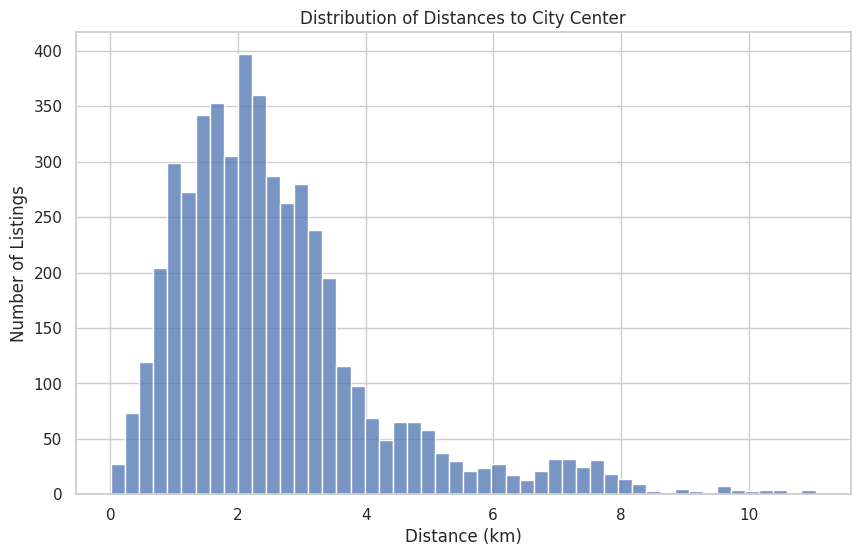

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram
sns.histplot(train['distance_to_city_center'], bins=50, ax=ax)

# Set the title and labels
ax.set_title('Distribution of Distances to City Center')
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Number of Listings')

# Show the plot
plt.show()


In [ ]:
train['distance_to_city_center'].describe()

count    4928.000000
mean        2.611556
std         1.674028
min         0.010000
25%         1.497500
50%         2.260000
75%         3.210000
max        11.050000
Name: distance_to_city_center, dtype: float64

# PIPE DE PREPROCESADO DE LA DATA QUE HACE TODO LO QUE ESTUVE HACIENDO EN LAS CELDAS DE ARRIBA

funcion que se sua para modificar las columnas iniciales del df combiando los tipos de datos

In [ ]:
import pandas as pd
train = pd.read_csv('base_train.csv')
val = pd.read_csv('base_val.csv')

In [ ]:
def change_columns(df):
    # Create boolean variable based on if host lives in the same neighborhood
    df['host_vive_mismo_barrio'] = df['host_neighbourhood'] == df['neighbourhood_cleansed']
    df['host_vive_mismo_barrio'] = df['host_vive_mismo_barrio'].astype(bool)
    
    # Convert date string to datetime format
    df['host_since'] = pd.to_datetime(df['host_since'], format="%Y/%m/%d")
    
    # Convert price string to float
    df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
    
    # Convert host acceptance rate string to float
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%','').astype(float)
    
    # Convert host response rate string to float
    df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float) / 100

    # Convert boolean columns from 't' and 'f' to 1 and 0, respectively
    bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
    df[bool_cols] = df[bool_cols].replace({'t': 1, 'f': 0})
    
    # Convert columns to boolean
    df[bool_cols] = df[bool_cols].astype(bool)
    
    # Convert object type columns to categorical type
    cat_cols = ['host_neighbourhood', 'host_response_time', 'host_location', 'host_verifications', 
                'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type']
    df[cat_cols] = df[cat_cols].astype('category')
    
    # Split the 'bathrooms_text' column into 'num_baths' and 'bath_type'
    df[['num_baths', 'bath_type']] = df['bathrooms_text'].str.extract(r'(\d+\.?\d*)\s(\b\w+\b)', expand=True)
    
    # Map 'private' and 'bath' to 'private'
    df['bath_type'] = df['bath_type'].map({'private': 'private', 'bath': 'private', 'shared': 'shared'})
    
    # Fill NaN values in 'bath_type' with 'private'
    df['bath_type'] = df['bath_type'].fillna('private')
    
    # Convert 'num_baths' to float
    df['num_baths'] = df['num_baths'].astype(float)
    
    # Drop the original 'bathrooms_text' and 'bathrooms' columns
    df = df.drop(['bathrooms_text', 'bathrooms'], axis=1)

    train['bath_type'] = train['bath_type'].astype('category')

    #drop minimium minumiun y max max 

    # Drop the specified columns
    columns_to_drop = ['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm',                   
                       'minimum_maximum_nights', 'maximum_maximum_nights', 'maximum_nights_avg_ntm']

    df.drop(columns_to_drop, axis=1, inplace=True)
    
    return df

Funcion que agarra la columna amenties, las separa y luego deja las que tienen una correlacion de mas del 5% abs con el revew score value que es la variable target.

In [ ]:
import re
from collections import Counter
from sklearn.preprocessing import StandardScaler

def preprocess_amenities_train(df):
    # Limpia la columna de amenities
    df['amenities'] = df['amenities'].astype(str)
    df['amenities'] = df['amenities'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s,]', '', x))

    # Convierte la columna de amenities en una lista de listas
    df['amenities'] = df['amenities'].apply(lambda x: [amenity.strip() for amenity in x.split(',')])

    # Obtiene un conteo de todas las amenities
    amenities_count = Counter([amenity for amenities in df['amenities'] for amenity in amenities])

    # Obtiene una lista de las amenities que aparecen 3 o más veces
    relevant_amenities = [amenity for amenity, count in amenities_count.items() if count >= 10]

    # Crea columnas binarias para cada amenity relevante
    for amenity in relevant_amenities:
        df['amenity_' + amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)

    # Crea una nueva columna para el total de amenities
    df['total_amenities'] = df['amenities'].apply(len)

    # Normaliza las características binarias
    scalers = {}
    for amenity in relevant_amenities:
        scaler = StandardScaler()
        df[['amenity_' + amenity]] = scaler.fit_transform(df[['amenity_' + amenity]])
        scalers[amenity] = scaler

    # Borra las columnas de amenities con correlaciones de valor absoluto menor a 0.05
    corr_with_target = df.corr()['review_scores_rating']
    low_corr_cols = [col for col in df.columns if col.startswith('amenity_') and abs(corr_with_target[col]) < 0.05]
    df.drop(low_corr_cols, axis=1, inplace=True)


    # Borra la columna original de amenities
    df = df.drop('amenities', axis=1)

    return df, relevant_amenities, scalers, low_corr_cols



Description feature engineering

In [ ]:
def preprocess_amenities_val(df, relevant_amenities, scalers, low_corr_cols):
    # Clean up the amenities column
    df['amenities'] = df['amenities'].astype(str)
    df['amenities'] = df['amenities'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s,]', '', x))

    # Convert the amenities column to a list of lists
    df['amenities'] = df['amenities'].apply(lambda x: [amenity.strip() for amenity in x.split(',')])

    # Create binary columns for each relevant amenity
    for amenity in relevant_amenities:
        df['amenity_' + amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)

    # Create a new column for total number of amenities
    df['total_amenities'] = df['amenities'].apply(len)

    # Add missing amenities columns and fill them with zeros
    missing_amenities = ['amenity_' + amenity for amenity in relevant_amenities if 'amenity_' + amenity not in df.columns]
    for amenity in missing_amenities:
        df[amenity] = 0

    # Normalize the binary features
    for amenity in relevant_amenities:
        if 'amenity_' + amenity in df.columns:
            df[['amenity_' + amenity]] = scalers[amenity].transform(df[['amenity_' + amenity]])
    
    # Drop low correlation amenities columns
    df.drop(low_corr_cols, axis=1, inplace=True)

    df = df.drop('amenities', axis=1)

    return df

In [ ]:
import re
import nltk
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer


def preprocess_text(train):
    # Carga la biblioteca de expresiones regulares
    import re
    
    # Fill NaN values with an empty string
    train['description'] = train['description'].fillna('')

    # Función para eliminar las etiquetas HTML y caracteres especiales
    train['description_processed'] = train['description'].map(lambda x: re.sub('[*-/<>,\/.!?]', '', x))
    # Convert the titles to lowercase
    train['description_processed'] = train['description_processed'].map(lambda x: x.lower())

    # Remove 'br' and 'b' from the 'description_processed' column
    train['description_processed'] = train['description_processed'].str.replace('br', '')
    train['description_processed'] = train['description_processed'].str.replace('b', '')
    train['description_processed'] = train['description_processed'].str.replace('<br>', '')
    train['description_processed'] = train['description_processed'].str.replace('<b>', '')
    train['description_processed'] = train['description_processed'].str.replace('</b><br />', '')
    train['description_processed'] = train['description_processed'].str.replace('<br />*', '') 

    # Define una función para reemplazar palabras específicas
    def replace_words(text):
        text = text.replace('bbr', '')
        text = text.replace('bthe', 'the')
        text = text.replace('blicense', 'license')
        text = text.replace('bguest', 'guest')
        text = text.replace('amsterdambr', 'amsterdam')
        text = text.replace('apartmentbr', 'apartment')
        return text

    # Aplica la función replace_words a la columna 'description_processed'
    train['description_processed'] = train['description_processed'].apply(replace_words)

    # Tokeniza las palabras en la columna 'description_processed'
    words = nltk.word_tokenize(' '.join(train['description_processed']))

    # Usa collections.Counter para obtener las frecuencias de las palabras
    word_frequencies = Counter(words)


    train['description'] = train['description'].astype(str)
    train["Description_Length"] = np.nan
    sent_int = SentimentIntensityAnalyzer()
    
    for i in train.index:
      # Score total del sentimiento de cada descripcion
      sentiment = sent_int.polarity_scores(train.loc[i, 'description'])
      train.loc[i, "Sentiment_intensity"] = sentiment["compound"]
      # long de la descripcion
      train.loc[i,"Description_Length"] = len(train.loc[i, 'description'].split())

    return train

In [ ]:
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def description_fields(train):
    # Asegurarse de que la columna 'description' es de tipo str
    train['description'] = train['description'].astype(str)
    
    # Crear una nueva columna 'Description_Length' llena de NaN
    train["Description_Length"] = np.nan
    
    # Inicializar el Analizador de Intensidad de Sentimiento de NLTK
    sent_int = SentimentIntensityAnalyzer()
    
    # Iterar sobre los índices del dataframe
    for i in train.index:
        # Calcular la puntuación de sentimiento total para cada descripción
        sentiment = sent_int.polarity_scores(train.loc[i, 'description'])
        
        # Asignar la intensidad del sentimiento a la columna 'Sentiment_intensity'
        train.loc[i, "Sentiment_intensity"] = sentiment["compound"]
        
        # Calcular la longitud de la descripción y asignarla a la columna 'Description_Length'
        train.loc[i,"Description_Length"] = len(train.loc[i, 'description'].split())
        
    # Retornar el dataframe modificado
    return train

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


FUNCION QUE BORRA COLUMNAS CON MISSING VALUES Y BORRA LAS 4 REVIEWS QUE SON NULL 

In [ ]:
def handle_missing_values_no_usables(df):
    null_columns = []
    for col in df.columns:
        null_sum = df[col].isnull().sum()
        if null_sum > 0:
            print(f"{col}: {null_sum}")
            null_columns.append(col)

    na_columns = ['neighbourhood_group_cleansed', 'calendar_updated', 'description', 'neighborhood_overview', 'host_about']
    df = df.drop(columns=na_columns)

    reviews_na = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                  'review_scores_communication', 'review_scores_location', 'review_scores_value']
    df = df.dropna(subset=reviews_na)

    df.drop('source', axis=1, inplace=True)

    return df


FUNCION QUE SE ENCARGA DE LOS OUTLIERS DE PRECIO MAYOR A 7000 Y DE LOS DE MINIMUN Y MAXIMUN NIGHTS

In [ ]:
import numpy as np

def impute_outliers(price, lower_bound, upper_bound):
    if isinstance(price, str) or price < lower_bound or price > upper_bound:
        return np.nan
    else:
        return price


def handle_outliers(df):

    lower_bound = 0
    upper_bound = 7000
    predictor_variables = ['bedrooms', 'beds', 'accommodates', 'num_baths']
    
    # Apply the impute_outliers function to the 'price' column
    df['price'] = df['price'].apply(impute_outliers, args=(lower_bound, upper_bound))

    # Calculate the average price for each group
    average_price_per_group = df.groupby(predictor_variables)['price'].transform('mean')

    # Fill the missing values in the 'price' column with the average price of the same group
    df['price'] = df['price'].fillna(average_price_per_group)

    # Calculate the median values for maximum_nights and minimum_nights without outliers
    max_nights_median_no_outliers = df.loc[df['maximum_nights'] <= df['maximum_nights'].median(), 'maximum_nights'].median()
    min_nights_median_no_outliers = df.loc[df['minimum_nights'] <= df['minimum_nights'].median(), 'minimum_nights'].median()

    # Replace the outliers with the median values
    df.loc[df['maximum_nights'] > df['maximum_nights'].median(), 'maximum_nights'] = max_nights_median_no_outliers
    df.loc[df['minimum_nights'] > df['minimum_nights'].median(), 'minimum_nights'] = min_nights_median_no_outliers

    print("Median maximum_nights without outliers:", max_nights_median_no_outliers)
    print("Median minimum_nights without outliers:", min_nights_median_no_outliers)

    # Calculamos la mediana de 'host_acceptance_rate', pero no contamos los ceros
    valor_mediano = df.loc[df['host_acceptance_rate'] != 0, 'host_acceptance_rate'].median()

    # Cambiamos los ceros por el valor mediano que calculamos
    df.loc[df['host_acceptance_rate'] == 0, 'host_acceptance_rate'] = valor_mediano

    return df

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

def impute_missing_values(train):

    # Create an imputer object with a most frequent filling strategy
    imputer = SimpleImputer(strategy='most_frequent')
    cols_to_impute = ['host_response_time','host_response_rate']

    # Fit the imputer and transform the dataset
    train[cols_to_impute] = imputer.fit_transform(train[cols_to_impute])

    return train

In [ ]:
#DSITANCIA A POIS EN AMSTERDAM

from math import radians, cos, sin, asin, sqrt
import pandas as pd

# Dictionary with the coordinates of each attraction
attractions = {
    'Rijksmuseum': (52.3740302, 4.8901928),
    'Van Gogh Museum': (52.3719652, 4.8922219),
    'Anne Frank House': (52.3720217, 4.8948897),
    'Begijnhof': (52.3716497, 4.891471),
    'Flower Market': (52.372175, 4.892517),
    'Vondelpark': (52.3722222, 4.8890556),
    'National Maritime Museum': (52.3712178, 4.8925209),
    'Red Light District': (52.3715648, 4.8961927),
    'Royal Palace Amsterdam': (52.3722222, 4.8858333),
}

def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return round(c * r, 2)

# Function to calculate the distance to each attraction
def calculate_distance_to_attractions(df):
    for attraction, coordinates in attractions.items():
        df['distance_to_' + attraction] = df.apply(
            lambda row: calculate_distance(row['latitude'], row['longitude'], coordinates[0], coordinates[1]), axis=1
        )
    return df

def compute_distances(df):
    df = calculate_distance_to_attractions(df)
    
    # Calculate the distance to the city center
    city_center = (52.3702, 4.8952)  # Approximate coordinates for Amsterdam city center
    df['distance_to_city_center'] = df.apply(lambda row: calculate_distance(
        row['latitude'], row['longitude'], city_center[0], city_center[1]
    ), axis=1)

    return df


In [ ]:
import pandas as pd
train = pd.read_csv('base_train.csv')
val = pd.read_csv('base_val.csv')

In [ ]:
# Preprocess train
train_preprocesado = (train
                      .pipe(change_columns)
                      .pipe(description_fields) 
                      .pipe(impute_missing_values)
                      .pipe(handle_missing_values_no_usables)
                      .pipe(handle_outliers)
                      .pipe(compute_distances)                     
                      )

train_preprocesado, relevant_amenities, scalers, low_corr_cols = preprocess_amenities_train(train_preprocesado)

train_preprocesado = train_preprocesado.copy()

In [ ]:
# Preprocess val
val_preprocesado = (val
                      .pipe(change_columns)
                      .pipe(description_fields) 
                      .pipe(impute_missing_values)
                      .pipe(handle_missing_values_no_usables)
                      .pipe(handle_outliers) 
                      .pipe(compute_distances) 
                      )
val_preprocesado = preprocess_amenities_val(val, relevant_amenities, scalers, low_corr_cols)

val_preprocesado = val_preprocesado.copy()


In [ ]:
# Para train_preprocesado
cols_with_na_train = [col for col in train_preprocesado.columns if train_preprocesado[col].isna().sum() > 0]
for col in cols_with_na_train:
    print(f'Columna: {col}')
    print(f'Tipo de Datos: {train_preprocesado[col].dtype}')
    print(f'Número de valores no-NA: {train_preprocesado[col].count()}')
    print(f'Número de valores NA: {train_preprocesado[col].isna().sum()}')
    print('\n')

# Para val_preprocesado
cols_with_na_val = [col for col in val_preprocesado.columns if val_preprocesado[col].isna().sum() > 0]
for col in cols_with_na_val:
    print(f'Columna: {col}')
    print(f'Tipo de Datos: {val_preprocesado[col].dtype}')
    print(f'Número de valores no-NA: {val_preprocesado[col].count()}')
    print(f'Número de valores NA: {val_preprocesado[col].isna().sum()}')
    print('\n')


Columna: host_location
Tipo de Datos: category
Número de valores no-NA: 4503
Número de valores NA: 421


Columna: host_acceptance_rate
Tipo de Datos: float64
Número de valores no-NA: 4149
Número de valores NA: 775


Columna: host_neighbourhood
Tipo de Datos: category
Número de valores no-NA: 2801
Número de valores NA: 2123


Columna: neighbourhood
Tipo de Datos: category
Número de valores no-NA: 3577
Número de valores NA: 1347


Columna: bedrooms
Tipo de Datos: float64
Número de valores no-NA: 4684
Número de valores NA: 240


Columna: beds
Tipo de Datos: float64
Número de valores no-NA: 4854
Número de valores NA: 70


Columna: license
Tipo de Datos: object
Número de valores no-NA: 4826
Número de valores NA: 98


Columna: num_baths
Tipo de Datos: float64
Número de valores no-NA: 4906
Número de valores NA: 18


Columna: description
Tipo de Datos: object
Número de valores no-NA: 1232
Número de valores NA: 1


Columna: neighborhood_overview
Tipo de Datos: object
Número de valores no-NA: 57

In [ ]:
del_colmumns= ['id', 'name', 'host_id', 'latitude', 'longitude', 'host_name','neighbourhood_cleansed', 'source', 'calendar_last_scraped', 'neighborhood_overview']

In [ ]:
def remove_columns(df, columns_to_remove):
    existing_columns = set(df.columns) & set(columns_to_remove)
    df = df.drop(columns=existing_columns)
    return df

train_preprocesado = remove_columns(train_preprocesado, del_colmumns)
val_preprocesado = remove_columns(val_preprocesado, del_colmumns)

if 'description' in train_preprocesado.columns:
    train_preprocesado = train_preprocesado.drop(columns=['description'])

if 'description' in val_preprocesado.columns:
    val_preprocesado = val_preprocesado.drop(columns=['description'])

if 'neighborhood_overview' in train_preprocesado.columns:
    train_preprocesado = train_preprocesado.drop(columns=['neighborhood_overview'])

if 'neighborhood_overview' in val_preprocesado.columns:
    val_preprocesado = val_preprocesado.drop(columns=['neighborhood_overview'])

if 'host_about' in train_preprocesado.columns:
    train_preprocesado = train_preprocesado.drop(columns=['host_about'])

if 'host_about' in val_preprocesado.columns:
    val_preprocesado = val_preprocesado.drop(columns=['host_about'])

# Modelos predictivos

In [ ]:
!pip install catboost
!pip install pickle
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


TRAIN

Preparo la data 

In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and validation sets
train_data, validation_data = train_test_split(train_preprocesado, test_size=0.2, random_state=42)

# Prepare the training dataset for CatBoost
X_train = train_data.drop("review_scores_rating", axis=1)
y_train = train_data["review_scores_rating"]

# Identify categorical columns in the training dataset
cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']

# Create a Pool for CatBoost
# Identify categorical columns in the training dataset

# Convert lists in categorical columns to comma-separated strings 
# Filling missing values in categorical columns in the training set

# Agregamos una categoria llaamda Unknown
for col in X_train.select_dtypes(['category']):
    X_train[col] = X_train[col].cat.add_categories(['Unknown']).fillna('Unknown')

for col in X_train.columns:
    if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category':
        X_train[col] = X_train[col].fillna("Unknown").apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category']

train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)


NameError: ignored

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Specify the hyperparameter space.
param_distributions = {
    'iterations': [1000, 2000, 3000],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [6, 8, 10],
    'loss_function': ['RMSE'],
    'task_type': ['GPU']
}

# Create a CatBoost model.
model = CatBoostRegressor(cat_features=cat_features)

# Set up the Randomized Search.
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=20,  # number of parameter settings that are sampled
    scoring='neg_root_mean_squared_error',
    cv=3,  # cross-validation strategy
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV object to the data.
random_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = random_search.best_params_
print("Best parameters found: ", best_parameters)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import time

# # Define the parameter grid
# param_grid = {
#     'iterations': [1000, 2000],
#     'learning_rate': [0.05, 0.1],
#     'depth': [6, 8],
#     'loss_function': ['RMSE'],  # This is constant in your case
#     'task_type': ['GPU'],  # use GPU
# }

# # Initialize the CatBoost Regressor
# model = CatBoostRegressor(cat_features=cat_features)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=model, 
#     param_grid=param_grid, 
#     cv=3,  # number of folds in cross-validation
#     scoring='neg_root_mean_squared_error',  # the scoring metric to use
#     verbose=2,  # print out progress
#     n_jobs=-1  # use all available processors. Set this to a specific number if you wish to limit the usage.
# )

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_parameters = grid_search.best_params_
# print("Best parameters found: ", best_parameters)

Best parameters found:  {'depth': 6, 'iterations': 1000, 'learning_rate': 0.1, 'loss_function': 'RMSE', 'task_type': 'GPU'}

In [ ]:
# Use the best parameters to create a new CatBoost model
best_model = CatBoostRegressor(
    iterations=best_parameters['iterations'],
    learning_rate=best_parameters['learning_rate'],
    depth=best_parameters['depth'],
    loss_function=best_parameters['loss_function'],
    cat_features=cat_features
)

# Then continue training with the best model
best_model.fit(X_train, y_train)

Test del train dataset

preparo la data

In [ ]:
# Prepare the validation dataset for CatBoost
X_validation = validation_data.drop("review_scores_rating", axis=1)
y_validation = validation_data["review_scores_rating"]

# Agregamos una categoria llaamda Unknown
for col in X_validation.select_dtypes(['category']):
    X_validation[col] = X_validation[col].cat.add_categories(['Unknown']).fillna('Unknown')

# Convert lists in categorical columns to comma-separated strings for X_validation
# Filling missing values in categorical columns in the validation set
for col in X_validation.columns:
    if X_validation[col].dtype == 'object' or X_validation[col].dtype.name == 'category':
        X_validation[col] = X_validation[col].fillna("Unknown").apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)


validation_pool = Pool(data=X_validation, cat_features=cat_features)

# Make predictions on the validation set
predictions = best_model.predict(X_validation)

# Calculate evaluation metrics
rmse = mean_squared_error(y_validation, predictions, squared=False)
r2 = r2_score(y_validation, predictions)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


Validation 

In [ ]:
#VALIDATION

# Prepare the validation dataset for CatBoost
X_validation = val_preprocesado.copy()

# Add missing columns to the validation set and fill with 'Unknown' or 0
for col in X_train.columns:
    if col not in X_validation.columns:
        if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category':
            X_validation[col] = 'Unknown'
        else:
            X_validation[col] = 0

# Agregamos una categoria llamada Unknown
for col in X_validation.select_dtypes(['category']):
    X_validation[col] = X_validation[col].cat.add_categories(['Unknown']).fillna('Unknown')

# Convert lists in categorical columns to comma-separated strings for X_validation
# Filling missing values in categorical columns in the validation set
for col in X_validation.columns:
    if X_validation[col].dtype == 'object' or X_validation[col].dtype.name == 'category':
        X_validation[col] = X_validation[col].fillna("Unknown").apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

validation_pool = Pool(data=X_validation, cat_features=cat_features)

# Make predictions on the validation set
# Ensure to replace `model` with your best model
best_model = random_search.best_estimator_
predictions = best_model.predict(validation_pool)


In [ ]:
from google.colab import files

#Armo el df para la submission
#Le agrego la columna id 
data = {'id': val['id'],
        'review_scores_rating': predictions}
# Create DataFrame
submission_df = pd.DataFrame(data)

# Save predictions to a csv file for submission
files.download('submission_df.csv')


Usando XGBoost que puede manejar NA'S , por ende, no hace falta borralrlos

In [ ]:
#PREPROCESADO: CONVERTIMOS LAS COLUMNAS DE TIEMPO Y OBJETO A NUM Y CAT. XGBOOST SOLO PROCEAS NUM, BOOL Y CAT

df_xgboost = train.copy()

import datetime as dt

# Replace 'host_since', 'first_review', and 'last_review' with the names of your datetime columns
datetime_columns = ['host_since', 'first_review', 'last_review']

# Convert datetime columns to seconds since the epoch
for column in datetime_columns:
    df_xgboost[column] = pd.to_datetime(df_xgboost[column])
    df_xgboost[column] = (df_xgboost[column] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

# Find the columns with 'object' dtype
object_columns = df_xgboost.select_dtypes(include=['object']).columns

# Convert object columns to categorical
for column in object_columns:
    # Check if the first element in the column is a list
    if isinstance(df_xgboost[column].iloc[0], list):
        # Convert lists to strings
        df_xgboost[column] = df_xgboost[column].apply(lambda x: ', '.join(map(str, x)))
    
    df_xgboost[column] = df_xgboost[column].astype('category')

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = df_xgboost.drop('review_scores_value', axis=1)
y = df_xgboost['review_scores_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix objects for training and testing data
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train, enable_categorical = True)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test, enable_categorical = True)

# Set parameters for XGBoost model
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 10000,
    'max_depth': 30,
    'learning_rate': 0.01,
    'random_state': 123
}

# Train the XGBoost model
model = xgb.train(params, train_dmatrix)

# Make predictions
y_pred = model.predict(test_dmatrix)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

In [ ]:
#preparo

# CATBOOST con gridsearch


In [ ]:
!pip install catboost
!pip install pickle
import pickle

TRAIN

Preparo la data 

In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and validation sets
train_data, validation_data = train_test_split(train_preprocesado, test_size=0.2, random_state=42)

# Prepare the training dataset for CatBoost
X_train = train_data.drop("review_scores_rating", axis=1)
y_train = train_data["review_scores_rating"]

# Identify categorical columns in the training dataset
cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']

# Create a Pool for CatBoost
# Identify categorical columns in the training dataset

# Convert lists in categorical columns to comma-separated strings 
# Filling missing values in categorical columns in the training set

# Agregamos una categoria llaamda Unknown
for col in X_train.select_dtypes(['category']):
    X_train[col] = X_train[col].cat.add_categories(['Unknown']).fillna('Unknown')

for col in X_train.columns:
    if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category':
        X_train[col] = X_train[col].fillna("Unknown").apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category']

train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)


NameError: ignored

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Specify the hyperparameter space.
param_distributions = {
    'iterations': [1000, 2000, 3000],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [6, 8, 10],
    'loss_function': ['RMSE'],
    'task_type': ['GPU']
}

# Create a CatBoost model.
model = CatBoostRegressor(cat_features=cat_features)

# Set up the Randomized Search.
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=20,  # number of parameter settings that are sampled
    scoring='neg_root_mean_squared_error',
    cv=3,  # cross-validation strategy
    verbose=4,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV object to the data.
random_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = random_search.best_params_
print("Best parameters found: ", best_parameters)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import time

# # Define the parameter grid
# param_grid = {
#     'iterations': [1000, 2000],
#     'learning_rate': [0.05, 0.1],
#     'depth': [6, 8],
#     'loss_function': ['RMSE'],  # This is constant in your case
#     'task_type': ['GPU'],  # use GPU
# }

# # Initialize the CatBoost Regressor
# model = CatBoostRegressor(cat_features=cat_features)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=model, 
#     param_grid=param_grid, 
#     cv=3,  # number of folds in cross-validation
#     scoring='neg_root_mean_squared_error',  # the scoring metric to use
#     verbose=2,  # print out progress
#     n_jobs=-1  # use all available processors. Set this to a specific number if you wish to limit the usage.
# )

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_parameters = grid_search.best_params_
# print("Best parameters found: ", best_parameters)

Best parameters found:  {'depth': 6, 'iterations': 1000, 'learning_rate': 0.1, 'loss_function': 'RMSE', 'task_type': 'GPU'}

In [ ]:
# Use the best parameters to create a new CatBoost model
best_model = CatBoostRegressor(
    iterations=best_parameters['iterations'],
    learning_rate=best_parameters['learning_rate'],
    depth=best_parameters['depth'],
    loss_function=best_parameters['loss_function'],
    cat_features=cat_features
)

# Then continue training with the best model
best_model.fit(X_train, y_train)

Test del train dataset

preparo la data

In [ ]:
# Prepare the validation dataset for CatBoost
X_validation = validation_data.drop("review_scores_rating", axis=1)
y_validation = validation_data["review_scores_rating"]

# Agregamos una categoria llaamda Unknown
for col in X_validation.select_dtypes(['category']):
    X_validation[col] = X_validation[col].cat.add_categories(['Unknown']).fillna('Unknown')

# Convert lists in categorical columns to comma-separated strings for X_validation
# Filling missing values in categorical columns in the validation set
for col in X_validation.columns:
    if X_validation[col].dtype == 'object' or X_validation[col].dtype.name == 'category':
        X_validation[col] = X_validation[col].fillna("Unknown").apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)


validation_pool = Pool(data=X_validation, cat_features=cat_features)

# Make predictions on the validation set
predictions = best_model.predict(X_validation)

# Calculate evaluation metrics
rmse = mean_squared_error(y_validation, predictions, squared=False)
r2 = r2_score(y_validation, predictions)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


Validation 

In [ ]:
#VALIDATION

# Prepare the validation dataset for CatBoost
X_validation = val_preprocesado.copy()

# Add missing columns to the validation set and fill with 'Unknown' or 0
for col in X_train.columns:
    if col not in X_validation.columns:
        if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category':
            X_validation[col] = 'Unknown'
        else:
            X_validation[col] = 0

# Agregamos una categoria llamada Unknown
for col in X_validation.select_dtypes(['category']):
    X_validation[col] = X_validation[col].cat.add_categories(['Unknown']).fillna('Unknown')

# Convert lists in categorical columns to comma-separated strings for X_validation
# Filling missing values in categorical columns in the validation set
for col in X_validation.columns:
    if X_validation[col].dtype == 'object' or X_validation[col].dtype.name == 'category':
        X_validation[col] = X_validation[col].fillna("Unknown").apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

validation_pool = Pool(data=X_validation, cat_features=cat_features)

# Make predictions on the validation set
# Ensure to replace `model` with your best model
best_model = random_search.best_estimator_
predictions = best_model.predict(validation_pool)


In [ ]:
from google.colab import files

#Armo el df para la submission
#Le agrego la columna id 
data = {'id': val['id'],
        'review_scores_rating': predictions}
# Create DataFrame
submission_df = pd.DataFrame(data)

# Save predictions to a csv file for submission
files.download('submission_df.csv')


Usando XGBoost que puede manejar NA'S , por ende, no hace falta borralrlos

In [ ]:
#PREPROCESADO: CONVERTIMOS LAS COLUMNAS DE TIEMPO Y OBJETO A NUM Y CAT. XGBOOST SOLO PROCEAS NUM, BOOL Y CAT

df_xgboost = train.copy()

import datetime as dt

# Replace 'host_since', 'first_review', and 'last_review' with the names of your datetime columns
datetime_columns = ['host_since', 'first_review', 'last_review']

# Convert datetime columns to seconds since the epoch
for column in datetime_columns:
    df_xgboost[column] = pd.to_datetime(df_xgboost[column])
    df_xgboost[column] = (df_xgboost[column] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

# Find the columns with 'object' dtype
object_columns = df_xgboost.select_dtypes(include=['object']).columns

# Convert object columns to categorical
for column in object_columns:
    # Check if the first element in the column is a list
    if isinstance(df_xgboost[column].iloc[0], list):
        # Convert lists to strings
        df_xgboost[column] = df_xgboost[column].apply(lambda x: ', '.join(map(str, x)))
    
    df_xgboost[column] = df_xgboost[column].astype('category')

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = df_xgboost.drop('review_scores_value', axis=1)
y = df_xgboost['review_scores_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix objects for training and testing data
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train, enable_categorical = True)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test, enable_categorical = True)

# Set parameters for XGBoost model
params = {
    'objective': 'reg:squarederror',
    'n_estimators': 10000,
    'max_depth': 30,
    'learning_rate': 0.01,
    'random_state': 123
}

# Train the XGBoost model
model = xgb.train(params, train_dmatrix)

# Make predictions
y_pred = model.predict(test_dmatrix)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

In [ ]:
#preparo

# CATBOOST CON RANDOMSEARCH

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Agregamos una categoria llaamda Unknown
for col in train_preprocesado.select_dtypes(['category']):
    train_preprocesado[col] = train_preprocesado[col].cat.add_categories(['Unknown']).fillna('Unknown')

for col in train_preprocesado.columns:
    if train_preprocesado[col].dtype == 'object' or train_preprocesado[col].dtype.name == 'category':
        train_preprocesado[col] = train_preprocesado[col].fillna("Unknown").apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

# Split the dataset into training and validation sets
train_data, validation_data = train_test_split(train_preprocesado, test_size=0.2, random_state=42)

# Prepare the training dataset for CatBoost
X_train = train_data.drop("review_scores_rating", axis=1)
y_train = train_data["review_scores_rating"]

# Prepare the validation dataset for CatBoost
X_validation = validation_data.drop("review_scores_rating", axis=1)
y_validation = validation_data["review_scores_rating"]

cat_features = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category']

train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)

validation_pool = Pool(data=X_validation, cat_features=cat_features)

In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import random

# Specify the hyperparameter space.
param_distributions = {
    'iterations': [1000, 2000, 3000],
    'learning_rate': [0.05, 0.1, 0.025],
    'depth': [6, 8, 7],
    'loss_function': ['RMSE'],
    'task_type': ['CPU']
}

best_score = np.inf
best_params = None

# Search through the hyperparameter space
for i in range(20):  # 20 iterations of random search
    params = {k: random.choice(v) for k, v in param_distributions.items()}

    # Create and train a CatBoost model.
    model = CatBoostRegressor(cat_features=cat_features, **params)
    model.fit(X_train, y_train)

    # Evaluate the model
    predictions = model.predict(X_validation)
    score = np.sqrt(mean_squared_error(y_validation, predictions))

    # If this model is better than previous ones, save it
    if score < best_score:
        best_score = score
        best_params = params
        best_model = model

print("Best parameters found: ", best_params)
print("Best score found: ", best_score)

# Prepare the validation set for submission
# Ensure to replace `model` with your best model
validation_pool = Pool(data=val_preprocesado, cat_features=cat_features)

predictions = best_model.predict(validation_pool)

# Save predictions to a csv file for submission
submission_df = pd.DataFrame({'id': val['id'], 'review_scores_rating': predictions})
submission_df.to_csv('submission_df.csv', index=False)


In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    cat_features=cat_features, 
    iterations=1000, 
    learning_rate=0.025, 
    depth=6, 
    loss_function='RMSE', 
    task_type='CPU'
)

model.fit(X_train, y_train)

#best_model =  {'iterations': 1000, 'learning_rate': 0.05, 'depth': 6, 'loss_function': 'RMSE', 'task_type': 'CPU'} 



In [ ]:
#VAL df para el submission

# Prepare the validation dataset for CatBoost
X_validation = val_preprocesado.copy()

# Add missing columns to the validation set and fill with 'Unknown' or 0
for col in X_train.columns:
    if col not in X_validation.columns:
        if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category':
            X_validation[col] = 'Unknown'
        else:
            X_validation[col] = 0

# Agregamos una categoria llamada Unknown
for col in X_validation.columns:
    if X_validation[col].dtype == 'object' or X_validation[col].dtype.name == 'category':
        X_validation[col] = X_validation[col].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

# Convert lists in categorical columns to comma-separated strings for X_validation

# Filling missing values in categorical columns in the validation set
for col in X_validation.columns:
    if X_validation[col].dtype.name == 'category':
        X_validation[col] = X_validation[col].cat.add_categories(['Unknown'])
        X_validation[col] = X_validation[col].fillna('Unknown')
    elif X_validation[col].dtype == 'object':
        X_validation[col] = X_validation[col].fillna('Unknown')
    X_validation[col] = X_validation[col].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)


validation_pool = Pool(data=X_validation, cat_features=cat_features)

# Make predictions on the validation set
# Ensure to replace `model` with your best model
#best_model = random_search.best_estimator_

predictions = model.predict(validation_pool)


from google.colab import files

#Armo el df para la submission
#Le agrego la columna id 
data = {'id': val['id'],
        'review_scores_rating': predictions}
# Create DataFrame
submission_df = pd.DataFrame(data)

# Save the DataFrame to a csv file
submission_df.to_csv('submission_df.csv', index=False)

# Download the csv file
files.download('submission_df.csv')


In [ ]:
# Save the DataFrame to a csv file
submission_df.to_csv('submission_df.csv', index=False)

# Download the csv file
files.download('submission_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TODO LO ANTERIOR JUNTO PARA QUE CORRA DE UNA


In [ ]:
#Best model parameters:  {'iterations': 1000, 'learning_rate': 0.025, 'depth': 6, 'loss_function': 'RMSE', 'task_type': 'GPU', 'cat_features': cat_features}


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Agregamos una categoria llaamda Unknown
for col in train_preprocesado.select_dtypes(['category']):
    train_preprocesado[col] = train_preprocesado[col].cat.add_categories(['Unknown']).fillna('Unknown')

for col in train_preprocesado.columns:
    if train_preprocesado[col].dtype == 'object' or train_preprocesado[col].dtype.name == 'category':
        train_preprocesado[col] = train_preprocesado[col].fillna("Unknown").apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

# Split the dataset into training and validation sets
train_data, validation_data = train_test_split(train_preprocesado, test_size=0.2, random_state=42)

# Prepare the training dataset for CatBoost
X_train = train_data.drop("review_scores_rating", axis=1)
y_train = train_data["review_scores_rating"]

# Prepare the validation dataset for CatBoost
X_validation = validation_data.drop("review_scores_rating", axis=1)
y_validation = validation_data["review_scores_rating"]

# Generate list of categorical features
cat_features = []

for col in X_train.columns:
    # Check if column is of object or category dtype
    if X_train[col].dtype.name in ['object', 'category']:
        cat_features.append(col)
    # Check if column contains string data
    elif isinstance(X_train[col][0], str):
        cat_features.append(col)

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    cat_features=cat_features, 
    iterations=1000, 
    learning_rate=0.025, 
    depth=6, 
    loss_function='RMSE', 
    task_type='CPU'
)

model.fit(X_train, y_train)

0:	learn: 0.2232962	total: 15.3ms	remaining: 15.3s
1:	learn: 0.2201854	total: 38.2ms	remaining: 19.1s
2:	learn: 0.2171502	total: 60.9ms	remaining: 20.3s
3:	learn: 0.2145325	total: 83.3ms	remaining: 20.8s
4:	learn: 0.2116754	total: 106ms	remaining: 21s
5:	learn: 0.2086914	total: 128ms	remaining: 21.2s
6:	learn: 0.2059393	total: 150ms	remaining: 21.3s
7:	learn: 0.2032164	total: 174ms	remaining: 21.5s
8:	learn: 0.2006885	total: 196ms	remaining: 21.5s
9:	learn: 0.1980209	total: 219ms	remaining: 21.7s
10:	learn: 0.1955171	total: 244ms	remaining: 22s
11:	learn: 0.1930167	total: 277ms	remaining: 22.8s
12:	learn: 0.1906181	total: 299ms	remaining: 22.7s
13:	learn: 0.1882634	total: 321ms	remaining: 22.6s
14:	learn: 0.1858848	total: 345ms	remaining: 22.6s
15:	learn: 0.1835988	total: 366ms	remaining: 22.5s
16:	learn: 0.1815475	total: 389ms	remaining: 22.5s
17:	learn: 0.1793745	total: 412ms	remaining: 22.5s
18:	learn: 0.1772558	total: 438ms	remaining: 22.6s
19:	learn: 0.1753642	total: 461ms	remaini

In [ ]:
#VAL df para el submission

# Prepare the validation dataset for CatBoost
X_validation = val_preprocesado.copy()

# Add missing columns to the validation set and fill with 'Unknown' or 0
for col in X_train.columns:
    if col not in X_validation.columns:
        if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category':
            X_validation[col] = 'Unknown'
        else:
            X_validation[col] = 0

# Agregamos una categoria llamada Unknown
for col in X_validation.columns:
    if X_validation[col].dtype == 'object' or X_validation[col].dtype.name == 'category':
        X_validation[col] = X_validation[col].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

# Convert lists in categorical columns to comma-separated strings for X_validation

# Filling missing values in categorical columns in the validation set
for col in X_validation.columns:
    if X_validation[col].dtype.name == 'category':
        X_validation[col] = X_validation[col].cat.add_categories(['Unknown'])
        X_validation[col] = X_validation[col].fillna('Unknown')
    elif X_validation[col].dtype == 'object':
        X_validation[col] = X_validation[col].fillna('Unknown')
    X_validation[col] = X_validation[col].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)
  



In [ ]:
validation_pool = Pool(data=X_validation, cat_features=cat_features)

predictions = model.predict(validation_pool)

from google.colab import files

#Armo el df para la submission
#Le agrego la columna id 
data = {'id': val['id'],
        'review_scores_rating': predictions}
# Create DataFrame
submission_df = pd.DataFrame(data)

# Save the DataFrame to a csv file
submission_df.to_csv('submission_df.csv', index=False)

# Download the csv file
files.download('submission_df.csv')

CatBoostError: ignored

In [ ]:
print(cat_features)

[1, 2, 6, 9, 12, 13, 14, 29, 30, 37, 46, 'host_response_time']


In [ ]:
# String to search
search_string = "e lived 4 years in Amsterdam, 2 years in Byron Bay"

# Check every column in train dataframe
for col in train.columns:
    if train[col].dtype == 'object':
        if train[col].str.contains(search_string).any():
            print(f"'{search_string}' found in column '{col}' of train dataframe.")

# Check every column in val dataframe
for col in val.columns:
    if val[col].dtype == 'object':
        if val[col].str.contains(search_string).any():
            print(f"'{search_string}' found in column '{col}' of val dataframe.")


'e lived 4 years in Amsterdam, 2 years in Byron Bay' found in column 'host_about' of val dataframe.


Ahora entreno el modelo con los parametros encontrados 

#Multiples modelos 

In [ ]:
# categorical_features = train_preprocesado.select_dtypes(include=['object', 'category']).columns
# for col in categorical_features:
#     if any(isinstance(el, list) for el in train_preprocesado[col]):
#         print(f'{col} contains lists')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import numpy as np
from google.colab import files
from scipy.stats import randint
import joblib

In [ ]:
def preprocess_data(data, target_column):
    # Split the data into features and target
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Split the features into numerical and categorical features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    # Define the preprocessing for numeric and categorical features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Combine the numeric and categorical transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Transform the dataset
    X_transformed = preprocessor.fit_transform(X)
    
    # Split the transformed data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print("RMSE: ", rmse)
    print("R2 Score: ", r2)

    return r2, rmse

In [ ]:
X_train, X_test, y_train, y_test = preprocess_data(train_preprocesado, 'review_scores_rating')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def train_linear_regression(X_train, y_train):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    return lr_model

from google.colab import drive
drive.mount('/content/gdrive')

def train_random_forest(X_train, y_train):
    param_grid_rf = {
        'n_estimators': [100, 200],
        'max_depth': [ 10, 20],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [ 4, 6],
        'bootstrap': [True, False]
    }
    rf_model = RandomForestRegressor()
    grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='r2', n_jobs=-1)
    grid_search_rf.fit(X_train, y_train)

    # Save the best hyperparameters to a file
    joblib.dump(grid_search_rf.best_params_, '/content/gdrive/MyDrive/train_random_forest_best_params.pkl')

    return grid_search_rf.best_estimator_

def train_decision_tree(X_train, y_train):
    param_grid_dt = {
        'max_depth': randint(1, 50),
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 11),
    }

    dt_model = DecisionTreeRegressor()
    rnd_search_dt = RandomizedSearchCV(dt_model, param_distributions=param_grid_dt, n_iter=10, scoring='neg_mean_squared_error', random_state=42)
    rnd_search_dt.fit(X_train, y_train)

    # Save the best hyperparameters to a file
    joblib.dump(rnd_search_dt.best_params_, '/content/gdrive/MyDrive/train_decision_tree_best_params.pkl')

    return rnd_search_dt.best_estimator_

def train_gradient_boosting(X_train, y_train):
    param_grid_xgb = {
        'n_estimators': randint(50, 200),
        'max_depth': randint(1, 50),
        'learning_rate': [0.01, 0.05, 0.1],
    }

    #xgb_model = XGBRegressor(tree_method='gpu_hist')
    xgb_model = XGBRegressor()

    rnd_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb, n_iter=10, scoring='neg_mean_squared_error', random_state=42)
    rnd_search_xgb.fit(X_train, y_train)
    
    # Save the best hyperparameters to a file
    joblib.dump(rnd_search_xgb.best_params_, '/content/gdrive/MyDrive/train_gradient_boosting_best_params.pkl')

    return rnd_search_xgb.best_estimator_

def train_svr(X_train, y_train):
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    return svr_model


# Use the functions
def apply_models(X_train, X_test, y_train, y_test):
    # print("Training Linear Regression...")
    # lr_model = train_linear_regression(X_train, y_train)
    # lr_r2, lr_rmse = evaluate_model(lr_model, X_test, y_test)

    # print("Training Support Vector Regression...")
    # svr_model = train_svr(X_train, y_train)
    # svr_r2, svr_rmse = evaluate_model(svr_model, X_test, y_test)

    # print("Training Gradient Boosting (XGBoost)...")
    # xgb_model = train_gradient_boosting(X_train, y_train)
    # xgb_r2, xgb_rmse = evaluate_model(xgb_model, X_test, y_test)

    print("Training Random Forest...")
    rf_model = train_random_forest(X_train, y_train)
    rf_r2, rf_rmse = evaluate_model(rf_model, X_test, y_test)

    print("Training Decision Tree...")
    dt_model = train_decision_tree(X_train, y_train)
    dt_r2, dt_rmse = evaluate_model(dt_model, X_test, y_test)
    
    return {
    #         'Linear Regression': (lr_model, lr_r2, lr_rmse), 
    #         'Support Vector Regression': (svr_model, svr_r2, svr_rmse), 
    #         'Gradient Boosting (XGBoost)': (xgb_model, xgb_r2, xgb_rmse), 
            'Random Forest': (rf_model, rf_r2, rf_rmse),
            'Decision Tree': (dt_model, dt_r2, dt_rmse)}

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
apply_models(X_train, X_test, y_train, y_test)

Training Random Forest...
RMSE:  0.11597293180621848
R2 Score:  0.73916775391448
Training Decision Tree...
RMSE:  0.14235751037183433
R2 Score:  0.6069853159825205


{'Random Forest': (RandomForestRegressor(max_depth=20, min_samples_leaf=6, min_samples_split=5),
  0.73916775391448,
  0.11597293180621848),
 'Decision Tree': (DecisionTreeRegressor(max_depth=12, min_samples_leaf=10, min_samples_split=7),
  0.6069853159825205,
  0.14235751037183433)}